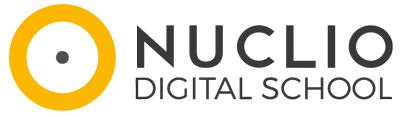

# **Entregable módulo 4: Análisis de datos - Proyecto final**

**Importante:** Guarda este fichero con la nomenclatura *Nombre_apellido_DataAnalysis.ipynb*

## **Caso práctico**
***Análisis de mercado para la apertura de centros especializados de Halterofilia***

***Lift & Lead***, es una startup interesada en abrir centros de entrenamiento especializados en halterofilia ya que con el auge del CrossFit, que integra técnicas de halterofilia, los fundadores creen que este puede ser un buen momento para invertir en centros dedicados exclusivamente a este deporte.

La dirección de ***Lift & Lead*** busca validar la hipótesis de que la popularidad del CrossFit está impulsando el interés por la halterofilia en Europa.

Actualmente no cuentan con mucho conocimiento y para empezar a comprender mejor el sector de la halterofilia y a sus atletas, te han asignado la tarea de analizar los resultados de los campeonatos europeos de halterofilia.

El análisis se hará en dos fases:

1. **Fase 1**: Te han proporcionado acceso a la base de datos de 2019 y 2020
  - La información fue obtenida a través de los siguientes enlaces por el anterior Data Analyst que ha dejado la compañía:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2019
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2020

2. **Fase 2:** Quieren enriquecer el análisis consideranto un periodo más amplio, incluyendo desde 2019 a 2024 pero no disponen de la información. Para obtenerla harás uso de web scraping de los siguientes enlaces:
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2021
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023
    - https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024

      **Importante:** Se deberá incluir al menos un año adicional de información

## **Preguntas obligatorias a responder (para cada una de las fases)**
- **Pregunta 1.** ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)
- **Pregunta 2.** ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?
- **Pregunta 3.** ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?

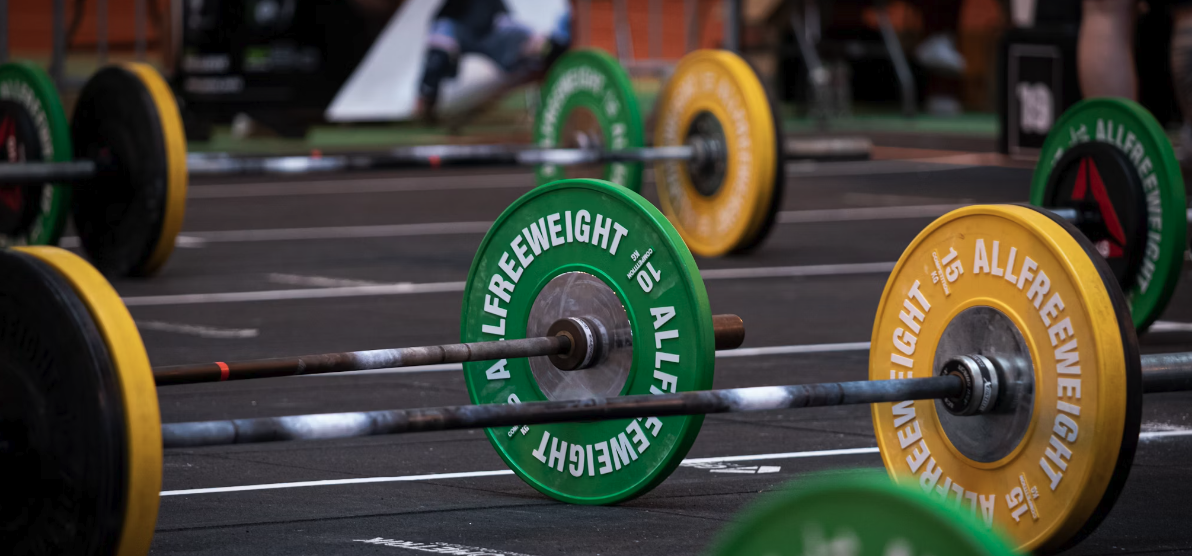

# **Fase 1.** Con la información disponible en el campus virtual

## 0. Importación de librerías

- **Paso 0: Importa las librerías necesarias y define funciones**

In [322]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Expresiones regulares
import re
from fuzzywuzzy import process

import warnings
warnings.filterwarnings('ignore')

## 1. Carga de datos

- **Paso 1: Carga los datos**

In [323]:
df_campeonato_2019 = pd.read_csv("/Users/ramitafrita/Documents/Master Nuclio Data Analytics/Data Analytics M4 Lara 2025/Entregable M4 Lara/2019_Datos_Campeonato_Europeo_de_Halterofilia.csv")
df_campeonato_2020 = pd.read_csv("/Users/ramitafrita/Documents/Master Nuclio Data Analytics/Data Analytics M4 Lara 2025/Entregable M4 Lara/2020_Datos_Campeonato_Europeo_de_Halterofilia.csv")

## 2. Exploración inicial

- **Paso 2: Realiza una exploración inicial de los datos a analizar**

In [324]:
df_campeonato_2019.head(5)

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino


In [325]:
df_campeonato_2020.head(5)

,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,2020,Masculino
1,61 kg (04.04),Stilian Grozdev Bulgaria 136 + 160 = 296,Shota Mishvelidze Georgia 135 + 155 = 290,Ferdi Hardal Turquía 130 + 157 = 287,2020,Masculino
2,67 kg (05.04),Muhammed Özbek Turquía 145 + 178 = 323,Mirko Zanni Italia 148 + 170 = 318,Valentin Guenchev Bulgaria 138 + 177 = 315,2020,Masculino
3,73 kg (06.04),Daniyar İsmayilov Turquía 160 + 181 = 341,Marin Robu Moldavia 156 + 183 = 339,Briken Calja Albania 152 + 184 = 336,2020,Masculino
4,81 kg (07.04),Antonino Pizzolato Italia 164 + 206 = 370,Karlos Nasar Bulgaria 163 + 206 = 369,Ritvars Suharevs Letonia 157 + 190 = 347,2020,Masculino


In [326]:
def check_df(df):
    if  print("¿Cuántas filas y columnas hay en el conjunto de datos?"):
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))

        print("¿Cuáles son las primeras dos filas del conjunto de datos?")
        display(df.head(2))
        print('\n########################################################################################')
    else:
        print("¿Cuántas filas y columnas hay en el conjunto de datos?")
        num_filas, num_columnas = df.shape
        print("\tHay {:,} filas y {:,} columnas.".format(num_filas, num_columnas))
        print('\n########################################################################################')

        print("¿Cuáles son las primeras cinco filas del conjunto de datos?")
        display(df.head())
        print('\n########################################################################################')

        print("¿Cuáles son las últimas cinco filas del conjunto de datos?")
        display(df.tail())
        print('\n########################################################################################')

        print("¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?")
        display(df.sample(n = 5))
        print('\n########################################################################################')

        print("¿Cuáles son las columnas del conjunto de datos? ¿Cuál es el tipo de datos de cada columna?")
        print(df.dtypes)
        print('\n########################################################################################')

        print("¿Cuántas columnas hay de cada tipo de datos?")
        print(df.dtypes.value_counts())
        print('\n########################################################################################')

        print("¿Cuáles son las variables numéricas?")
        df_numericas = df.select_dtypes(include = 'number')
        columnas_numericas = list(df_numericas.columns)
        print(columnas_numericas)
        print('\n########################################################################################')

        print("¿Cuáles son las variables categóricas?")
        df_categoricas = df.select_dtypes(include = 'object')
        columnas_categoricas = list(df_categoricas.columns)
        print(columnas_categoricas)
        print('\n########################################################################################')

        print("¿Cuántos valores únicos tiene cada columna?")
        print(df.nunique())
        print('\n########################################################################################')

        if len(columnas_numericas)>0:
            print("¿Cuáles son las estadísticas descriptivas básicas de las columnas numéricas?")
            display(df.describe(include = 'number'))
            print('\n########################################################################################')

        if len(columnas_categoricas)>0:
            print("¿Cuáles son las estadísticas descriptivas básicas de las columnas categóricas?")
            display(df.describe(include = 'object'))

In [327]:
check_df(df_campeonato_2019)

¿Cuántas filas y columnas hay en el conjunto de datos?
¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 20 filas y 6 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
3,73 kg (09.04),Bozhidar Andreev Bulgaria 153 + 192 = 345,Briken Calja Albania 156 + 183 = 339,Vadzim Lijarad Bielorrusia 153 + 182 = 335,2019,Masculino
4,81 kg (10.04),Antonino Pizzolato Italia 155 + 201 = 356,Piotr Asayonak Bielorrusia 159 + 196 = 355,Ritvars Suharevs Letonia 162 + 192 = 354,2019,Masculino



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Año,Genero
15,71 kg (10.04),Anastasiya Romanova Rusia 112 + 128 = 240,Emily Godley Reino Unido 93 + 123 = 216,Mădălina Molie Rumania 101 + 114 = 215,2019,Femenino
16,76 kg (11.04),Daria Naumava Bielorrusia 106 + 136 = 242,Lidia Valentín[2]​ España 108 + 133 = 241,Patricia Strenius Suecia 101 + 132 = 233,2019,Femenino
17,81 kg[n 2]​ (12.04),Nina Schroth Alemania 102 + 120 = 222,Anna Van Bellinghen Bélgica 103 + 118 = 221,Liana Guiurdzhian Armenia 97 + 120 = 217,2019,Femenino
18,87 kg (12.04),Xeniya Pasjina Rusia 110 + 132 = 242,Diana Mstiyeva Rusia 110 + 130 = 240,Sarah Fischer Austria 102 + 129 = 231,2019,Femenino
19,+87 kg (13.04),Tatiana Kashirina Rusia 146 + 185 = 331,Anastasiya Lysenko Ucrania 120 + 148 = 268,Emily Campbell Reino Unido 115 + 145 = 260,2019,Femenino



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Año,Genero
2,67 kg (08.04),Bernardin Matam Francia 137 + 175 = 312,Simon Brandhuber Alemania 146 + 165 = 311,Goga Chjeidze Georgia 139 + 169 = 308,2019,Masculino
1,61 kg (07.04),Henadz Laptseu Bielorrusia 133 + 153 = 286,Bünyamin Sezer Turquía 132 + 151 = 283,Ferdi Hardal Turquía 127 + 155 = 282,2019,Masculino
11,49 kg (06.04),Elena Andrieș Rumania 87 + 103 = 190,Kristina Sobol Rusia 85 + 95 = 180,Giorgia Russo Italia 75 + 103 = 178,2019,Femenino
0,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,2019,Masculino
14,64 kg (09.04),Loredana Toma Rumania 111 + 128 = 239,Irina Lepșa Rumania 102 + 127 = 229,Zoe Smith Reino Unido 96 + 128 = 224,2019,Femenino



########################################################################################
¿Cuáles son las columnas del conjunto de datos? ¿Cuál es el tipo de datos de cada columna?
Eventos    object
Oro        object
Plata      object
Bronce     object
Año         int64
Genero     object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object    5
int64     1
Name: count, dtype: int64

########################################################################################
¿Cuáles son las variables numéricas?
['Año']

########################################################################################
¿Cuáles son las variables categóricas?
['Eventos', 'Oro', 'Plata', 'Bronce', 'Genero']

########################################################################################
¿Cuántos valores únicos tiene cada columna?
Eventos    20
Oro        20
Plata      20
Bronce     20
Año       

,Año
count,20.0
mean,2019.0
std,0.0
min,2019.0
25%,2019.0
50%,2019.0
75%,2019.0
max,2019.0



########################################################################################
¿Cuáles son las estadísticas descriptivas básicas de las columnas categóricas?


,Eventos,Oro,Plata,Bronce,Genero
count,20,20,20,20,20
unique,20,20,20,20,2
top,55 kg (06.04),Mirco Scarantino Italia 116 + 145 = 261[n 1]​,Anguel Rusev Bulgaria 110 + 146 = 256[n 1]​,Muammer Şahin Turquía 112 + 135 = 247[n 1]​,Masculino
freq,1,1,1,1,10


In [328]:
check_df(df_campeonato_2020)

¿Cuántas filas y columnas hay en el conjunto de datos?
¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 20 filas y 6 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Año,Genero
0,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,2020,Masculino
1,61 kg (04.04),Stilian Grozdev Bulgaria 136 + 160 = 296,Shota Mishvelidze Georgia 135 + 155 = 290,Ferdi Hardal Turquía 130 + 157 = 287,2020,Masculino
2,67 kg (05.04),Muhammed Özbek Turquía 145 + 178 = 323,Mirko Zanni Italia 148 + 170 = 318,Valentin Guenchev Bulgaria 138 + 177 = 315,2020,Masculino
3,73 kg (06.04),Daniyar İsmayilov Turquía 160 + 181 = 341,Marin Robu Moldavia 156 + 183 = 339,Briken Calja Albania 152 + 184 = 336,2020,Masculino
4,81 kg (07.04),Antonino Pizzolato Italia 164 + 206 = 370,Karlos Nasar Bulgaria 163 + 206 = 369,Ritvars Suharevs Letonia 157 + 190 = 347,2020,Masculino



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Año,Genero
15,71 kg (07.04),Emily Godley Reino Unido 98 + 129 = 227,Alessia Durante Italia 97 + 122 = 219,Raluca Olaru Rumania 98 + 120 = 218,2020,Femenino
16,76 kg (08.04),Iryna Deja Ucrania 113 + 135 = 248,Yana Sotiyeva Rusia 112 + 134 = 246,Anastasiya Romanova Rusia 111 + 132 = 243,2020,Femenino
17,81 kg (09.04),Alina Marushchak Ucrania 109 + 127 = 236,Gaëlle Nayo-Ketchanke Francia 100 + 131 = 231,Liana Guiurdzhian Armenia 98 + 129 = 227,2020,Femenino
18,87 kg (10.04),Daria Ajmerova Rusia 108 + 138 = 246,Elena Cîlcic Moldavia 107 + 138 = 245,Daria Riazanova Rusia 105 + 135 = 240,2020,Femenino
19,+87 kg (11.04),Emily Campbell Reino Unido 122 + 154 = 276,Anastasiya Lysenko Ucrania 116 + 136 = 252,Melike Günal Turquía 108 + 135 = 243,2020,Femenino



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Eventos,Oro,Plata,Bronce,Año,Genero
19,+87 kg (11.04),Emily Campbell Reino Unido 122 + 154 = 276,Anastasiya Lysenko Ucrania 116 + 136 = 252,Melike Günal Turquía 108 + 135 = 243,2020,Femenino
2,67 kg (05.04),Muhammed Özbek Turquía 145 + 178 = 323,Mirko Zanni Italia 148 + 170 = 318,Valentin Guenchev Bulgaria 138 + 177 = 315,2020,Masculino
14,64 kg (06.04),Loredana Toma Rumania 114 + 130 = 244,Sarah Davies Reino Unido 101 + 129 = 230,Anastasiya Anzorova Rusia 100 + 122 = 222,2020,Femenino
16,76 kg (08.04),Iryna Deja Ucrania 113 + 135 = 248,Yana Sotiyeva Rusia 112 + 134 = 246,Anastasiya Romanova Rusia 111 + 132 = 243,2020,Femenino
11,49 kg (03.04),Monica Csengeri Rumania 86 + 103 = 189,Kristina Sobol Rusia 85 + 96 = 181,Mihaela Cambei Rumania 80 + 100 = 180,2020,Femenino



########################################################################################
¿Cuáles son las columnas del conjunto de datos? ¿Cuál es el tipo de datos de cada columna?
Eventos    object
Oro        object
Plata      object
Bronce     object
Año         int64
Genero     object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object    5
int64     1
Name: count, dtype: int64

########################################################################################
¿Cuáles son las variables numéricas?
['Año']

########################################################################################
¿Cuáles son las variables categóricas?
['Eventos', 'Oro', 'Plata', 'Bronce', 'Genero']

########################################################################################
¿Cuántos valores únicos tiene cada columna?
Eventos    19
Oro        20
Plata      20
Bronce     20
Año       

,Año
count,20.0
mean,2020.0
std,0.0
min,2020.0
25%,2020.0
50%,2020.0
75%,2020.0
max,2020.0



########################################################################################
¿Cuáles son las estadísticas descriptivas básicas de las columnas categóricas?


,Eventos,Oro,Plata,Bronce,Genero
count,20,20,20,20,20
unique,19,20,20,20,2
top,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,Masculino
freq,2,1,1,1,10


## 3. Limpieza de datos

- **Paso 3: Asegúrate de que los datos no contengan valores problemáticos**

In [332]:

# Función para extraer la puntuación (ej: "155 + 201 = 356")
def sacar_puntuacion(texto):
    match = re.search(r'\d+\s*\+\s*\d+\s*=\s*\d+', str(texto))
    return match.group(0) if match else ""

# Función para eliminar la puntuación del texto original
def quitar_puntuacion(texto):
    return re.sub(r'\d+\s*\+\s*\d+\s*=\s*\d+', '', str(texto)).strip()

# Aplicar a los DataFrames
for df in [df_campeonato_2019, df_campeonato_2020]:
    # Extraer las puntuaciones
    df['Puntuacion_Oro'] = df['Oro'].apply(sacar_puntuacion)
    df['Puntuacion_Plata'] = df['Plata'].apply(sacar_puntuacion)
    df['Puntuacion_Bronce'] = df['Bronce'].apply(sacar_puntuacion)

    # Quitar las puntuaciones del texto original
    df['Oro'] = df['Oro'].apply(quitar_puntuacion)
    df['Plata'] = df['Plata'].apply(quitar_puntuacion)
    df['Bronce'] = df['Bronce'].apply(quitar_puntuacion)

In [333]:
# Función mejorada para eliminar referencias + espacios invisibles
def quitar_referencias(texto):
    texto = str(texto)
    # Eliminar referencias como [n 1], [n 2]...
    texto = re.sub(r'\[n \d+\]', '', texto)
    # Reemplazar caracteres invisibles comunes
    texto = (
        texto.replace('\u200b', '')  # zero-width space
              .replace('\u202f', ' ')  # narrow no-break space → espacio normal
              .replace('\u00a0', ' ')  # non-breaking space → espacio normal
    )
    return texto.strip()  # Eliminar espacios normales al inicio y final

# Aplicar la limpieza a todas las columnas de texto
for df in [df_campeonato_2019, df_campeonato_2020]:
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].apply(quitar_referencias)

In [334]:
# Lista completa con nombres compuestos también
paises = [
    "Reino Unido", "Bielorrusia", "Turquía", "Francia", "Alemania", "Albania", "Letonia",
    "Armenia", "Ucrania", "Rusia", "Italia", "Georgia", "Rumania", "Austria", "Moldavia",
    "Bélgica", "Suecia", "España", "Polonia", "Bulgaria", "Azerbaiyán"
]

# Función para extraer el país buscando por coincidencia al final
def sacar_pais(texto):
    texto = str(texto).strip()
    for pais in paises:
        if texto.endswith(pais):
            return pais
    return ""

# Función para quitar el país del final, si coincide con la lista
def sacar_nombre(texto):
    texto = str(texto).strip()
    for pais in paises:
        if texto.endswith(pais):
            return texto[:-(len(pais))].strip()
    return texto

# Aplicar a los DataFrames
for df in [df_campeonato_2019, df_campeonato_2020]:
    # Oro
    df['Pais_Oro'] = df['Oro'].apply(sacar_pais)
    df['Oro'] = df['Oro'].apply(sacar_nombre)

    # Plata
    df['Pais_Plata'] = df['Plata'].apply(sacar_pais)
    df['Plata'] = df['Plata'].apply(sacar_nombre)

    # Bronce
    df['Pais_Bronce'] = df['Bronce'].apply(sacar_pais)
    df['Bronce'] = df['Bronce'].apply(sacar_nombre)



In [335]:
df_campeonato_2019

,Eventos,Oro,Plata,Bronce,Año,Genero,Puntuacion_Oro,Puntuacion_Plata,Puntuacion_Bronce,Pais_Oro,Pais_Plata,Pais_Bronce
0,55 kg (06.04),Mirco Scarantino,Anguel Rusev,Muammer Şahin,2019,Masculino,116 + 145 = 261,110 + 146 = 256,112 + 135 = 247,Italia,Bulgaria,Turquía
1,61 kg (07.04),Henadz Laptseu,Bünyamin Sezer,Ferdi Hardal,2019,Masculino,133 + 153 = 286,132 + 151 = 283,127 + 155 = 282,Bielorrusia,Turquía,Turquía
2,67 kg (08.04),Bernardin Matam,Simon Brandhuber,Goga Chjeidze,2019,Masculino,137 + 175 = 312,146 + 165 = 311,139 + 169 = 308,Francia,Alemania,Georgia
3,73 kg (09.04),Bozhidar Andreev,Briken Calja,Vadzim Lijarad,2019,Masculino,153 + 192 = 345,156 + 183 = 339,153 + 182 = 335,Bulgaria,Albania,Bielorrusia
4,81 kg (10.04),Antonino Pizzolato,Piotr Asayonak,Ritvars Suharevs,2019,Masculino,155 + 201 = 356,159 + 196 = 355,162 + 192 = 354,Italia,Bielorrusia,Letonia
5,89 kg (11.04),Hakob Mkrtchian,Revaz Davitadze,Davit Hovhannisian,2019,Masculino,164 + 207 = 371,170 + 200 = 370,165 + 195 = 360,Armenia,Georgia,Armenia
6,96 kg (12.04),Yauheni Tsijantsou,Yegor Klimonov,Anton Pliesnoi,2019,Masculino,178 + 222 = 400,168 + 210 = 378,173 + 204 = 377,Bielorrusia,Rusia,Georgia
7,102 kg (13.04),Dmytro Chumak,Samvel Gasparian,Vadzim Straltsou,2019,Masculino,175 + 216 = 391,168 + 209 = 377,170 + 206 = 376,Ucrania,Armenia,Bielorrusia
8,109 kg (13.04),Simon Martirosian,Andrei Aramnau,Rodion Bochkov,2019,Masculino,192 + 235 = 427,190 + 221 = 411,192 + 218 = 410,Armenia,Bielorrusia,Rusia
9,+109 kg (13.04),Lasha Talajadze,Irakli Turmanidze,Ruben Alexanian,2019,Masculino,218 + 260 = 478,206 + 241 = 447,195 + 245 = 440,Georgia,Georgia,Armenia


In [336]:
df_campeonato_2020

,Eventos,Oro,Plata,Bronce,Año,Genero,Puntuacion_Oro,Puntuacion_Plata,Puntuacion_Bronce,Pais_Oro,Pais_Plata,Pais_Bronce
0,55 kg (04.04),Anguel Rusev,Valentin Iancu,Dmytro Voronovsky,2020,Masculino,111 + 147 = 258,108 + 140 = 248,110 + 137 = 247,Bulgaria,Rumania,Ucrania
1,61 kg (04.04),Stilian Grozdev,Shota Mishvelidze,Ferdi Hardal,2020,Masculino,136 + 160 = 296,135 + 155 = 290,130 + 157 = 287,Bulgaria,Georgia,Turquía
2,67 kg (05.04),Muhammed Özbek,Mirko Zanni,Valentin Guenchev,2020,Masculino,145 + 178 = 323,148 + 170 = 318,138 + 177 = 315,Turquía,Italia,Bulgaria
3,73 kg (06.04),Daniyar İsmayilov,Marin Robu,Briken Calja,2020,Masculino,160 + 181 = 341,156 + 183 = 339,152 + 184 = 336,Turquía,Moldavia,Albania
4,81 kg (07.04),Antonino Pizzolato,Karlos Nasar,Ritvars Suharevs,2020,Masculino,164 + 206 = 370,163 + 206 = 369,157 + 190 = 347,Italia,Bulgaria,Letonia
5,89 kg (08.04),Karen Avaguian,Revaz Davitadze,Andranik Karapetian,2020,Masculino,175 + 200 = 375,171 + 203 = 374,170 + 195 = 365,Armenia,Georgia,Armenia
6,96 kg (09.04),Anton Pliesnoi,Piotr Asayonak,Hakob Mkrtchian,2020,Masculino,180 + 213 = 393,172 + 202 = 374,160 + 212 = 372,Georgia,Bielorrusia,Armenia
7,102 kg (10.04),Samvel Gasparian,Arsen Martirosian,Dadaş Dadaşbəyli,2020,Masculino,176 +214 = 390,171 + 209 = 380,177 + 202 = 379,Armenia,Armenia,Azerbaiyán
8,109 kg (10.04),Dmytro Chumak,Jristo Jristov,Timur Naniyev,2020,Masculino,181 + 226 = 407,186 + 220 = 406,184 + 217 = 401,Ucrania,Bulgaria,Rusia
9,+109 kg (11.04),Lasha Talajadze,Gor Minasian,Varazdat Lalayan,2020,Masculino,222 + 263 = 485,216 + 248 = 464,205 + 240 = 445,Georgia,Armenia,Armenia


In [337]:
def identificacion_valores_problem(df, columnas=[]):
    print('###################################################################################')
    print('3.1.1. Proporción de NULOS en cada una de las columnas del conjunto de datos:')
    print(round((df.isnull().sum()/len(df))*100, 2).sort_values(ascending= False))
    print('###################################################################################')
    print(f'3.1.2. Número de DUPLICADOS totales: {df.duplicated().sum()}')
    print('###################################################################################')
    if len(columnas) > 0:
        print(f'3.1.2. Número de DUPLICADOS parciales según las columnas {columnas}: {df.duplicated(subset=columnas).sum()}')
        print('###################################################################################')
    df_numericas = df.select_dtypes(include = 'number')
    columnas_numericas = list(df_numericas.columns)
    if len(columnas_numericas) > 0:
        print('3.1.3. Columnas numéricas con OUTLIERS')
        for var in columnas_numericas:
            Q1 = df[var].quantile(0.25)
            Q3 = df[var].quantile(0.75)
            limite_inferior = Q1 - 1.5 * (Q3 - Q1)
            limite_superior = Q3 + 1.5 * (Q3 - Q1)
            outliers = df[(df[var] < limite_inferior) | (df[var] > limite_superior)]
            print(f'Número de outliers en la columna "{var}": {outliers.shape[0]}')
        print('###################################################################################')

In [338]:
identificacion_valores_problem(df=df_campeonato_2019, columnas=df_campeonato_2019.columns)

###################################################################################
3.1.1. Proporción de NULOS en cada una de las columnas del conjunto de datos:
Eventos              0.0
Oro                  0.0
Plata                0.0
Bronce               0.0
Año                  0.0
Genero               0.0
Puntuacion_Oro       0.0
Puntuacion_Plata     0.0
Puntuacion_Bronce    0.0
Pais_Oro             0.0
Pais_Plata           0.0
Pais_Bronce          0.0
dtype: float64
###################################################################################
3.1.2. Número de DUPLICADOS totales: 0
###################################################################################
3.1.2. Número de DUPLICADOS parciales según las columnas Index(['Eventos', 'Oro', 'Plata', 'Bronce', 'Año', 'Genero', 'Puntuacion_Oro',
       'Puntuacion_Plata', 'Puntuacion_Bronce', 'Pais_Oro', 'Pais_Plata',
       'Pais_Bronce'],
      dtype='object'): 0
##########################################################

In [339]:
identificacion_valores_problem(df=df_campeonato_2020, columnas=df_campeonato_2020.columns)

###################################################################################
3.1.1. Proporción de NULOS en cada una de las columnas del conjunto de datos:
Eventos              0.0
Oro                  0.0
Plata                0.0
Bronce               0.0
Año                  0.0
Genero               0.0
Puntuacion_Oro       0.0
Puntuacion_Plata     0.0
Puntuacion_Bronce    0.0
Pais_Oro             0.0
Pais_Plata           0.0
Pais_Bronce          0.0
dtype: float64
###################################################################################
3.1.2. Número de DUPLICADOS totales: 0
###################################################################################
3.1.2. Número de DUPLICADOS parciales según las columnas Index(['Eventos', 'Oro', 'Plata', 'Bronce', 'Año', 'Genero', 'Puntuacion_Oro',
       'Puntuacion_Plata', 'Puntuacion_Bronce', 'Pais_Oro', 'Pais_Plata',
       'Pais_Bronce'],
      dtype='object'): 0
##########################################################

In [340]:
df_campeonato_2019.dtypes

Eventos              object
Oro                  object
Plata                object
Bronce               object
Año                   int64
Genero               object
Puntuacion_Oro       object
Puntuacion_Plata     object
Puntuacion_Bronce    object
Pais_Oro             object
Pais_Plata           object
Pais_Bronce          object
dtype: object

In [341]:
df_campeonato_2020.dtypes

Eventos              object
Oro                  object
Plata                object
Bronce               object
Año                   int64
Genero               object
Puntuacion_Oro       object
Puntuacion_Plata     object
Puntuacion_Bronce    object
Pais_Oro             object
Pais_Plata           object
Pais_Bronce          object
dtype: object

## 4. Transformación de datos

- **Paso 4: Crea un único dataframe con los datos de 2019 y 2020**

In [ ]:
# Añadir una columna 'Año' a cada DataFrame si aún no existe o para asegurarme
df_campeonato_2019['Año'] = 2019
df_campeonato_2020['Año'] = 2020

# Concatenar fila a fila (uno debajo del otro)
df_combinado = pd.concat([df_campeonato_2019, df_campeonato_2020], ignore_index=True)

In [343]:
df_combinado

,Eventos,Oro,Plata,Bronce,Año,Genero,Puntuacion_Oro,Puntuacion_Plata,Puntuacion_Bronce,Pais_Oro,Pais_Plata,Pais_Bronce
0,55 kg (06.04),Mirco Scarantino,Anguel Rusev,Muammer Şahin,2019,Masculino,116 + 145 = 261,110 + 146 = 256,112 + 135 = 247,Italia,Bulgaria,Turquía
1,61 kg (07.04),Henadz Laptseu,Bünyamin Sezer,Ferdi Hardal,2019,Masculino,133 + 153 = 286,132 + 151 = 283,127 + 155 = 282,Bielorrusia,Turquía,Turquía
2,67 kg (08.04),Bernardin Matam,Simon Brandhuber,Goga Chjeidze,2019,Masculino,137 + 175 = 312,146 + 165 = 311,139 + 169 = 308,Francia,Alemania,Georgia
3,73 kg (09.04),Bozhidar Andreev,Briken Calja,Vadzim Lijarad,2019,Masculino,153 + 192 = 345,156 + 183 = 339,153 + 182 = 335,Bulgaria,Albania,Bielorrusia
4,81 kg (10.04),Antonino Pizzolato,Piotr Asayonak,Ritvars Suharevs,2019,Masculino,155 + 201 = 356,159 + 196 = 355,162 + 192 = 354,Italia,Bielorrusia,Letonia
5,89 kg (11.04),Hakob Mkrtchian,Revaz Davitadze,Davit Hovhannisian,2019,Masculino,164 + 207 = 371,170 + 200 = 370,165 + 195 = 360,Armenia,Georgia,Armenia
6,96 kg (12.04),Yauheni Tsijantsou,Yegor Klimonov,Anton Pliesnoi,2019,Masculino,178 + 222 = 400,168 + 210 = 378,173 + 204 = 377,Bielorrusia,Rusia,Georgia
7,102 kg (13.04),Dmytro Chumak,Samvel Gasparian,Vadzim Straltsou,2019,Masculino,175 + 216 = 391,168 + 209 = 377,170 + 206 = 376,Ucrania,Armenia,Bielorrusia
8,109 kg (13.04),Simon Martirosian,Andrei Aramnau,Rodion Bochkov,2019,Masculino,192 + 235 = 427,190 + 221 = 411,192 + 218 = 410,Armenia,Bielorrusia,Rusia
9,+109 kg (13.04),Lasha Talajadze,Irakli Turmanidze,Ruben Alexanian,2019,Masculino,218 + 260 = 478,206 + 241 = 447,195 + 245 = 440,Georgia,Georgia,Armenia


- **Paso 5: Transforma el DataFrame para tener las siguientes columnas: Eventos, Año, Genero, Medalla (que indica si es Oro, Plata o Bronce) y Atleta (que contiene la información del atleta correspondiente)**

    Formato inicial:

    | Eventos | Oro | Plata | Bronce | Año | Género |
    |---------|-----|-------|--------|-----|--------|

    **¡Importante!**
    El dataframe final debe tener este formato:

    | Eventos | Año | Genero | Medalla | Atleta |
    |---------|-----|-------|--------|-----|

In [344]:
# Reorganizamos las columnas: convertimos Oro, Plata, Bronce en filas
df_transformado = df_combinado.melt(
    id_vars=['Eventos', 'Año', 'Genero'],
    value_vars=['Oro', 'Plata', 'Bronce'],
    var_name='Medalla',
    value_name='Atleta')

In [345]:
df_transformado

,Eventos,Año,Genero,Medalla,Atleta
0,55 kg (06.04),2019,Masculino,Oro,Mirco Scarantino
1,61 kg (07.04),2019,Masculino,Oro,Henadz Laptseu
2,67 kg (08.04),2019,Masculino,Oro,Bernardin Matam
3,73 kg (09.04),2019,Masculino,Oro,Bozhidar Andreev
4,81 kg (10.04),2019,Masculino,Oro,Antonino Pizzolato
...,...,...,...,...,...
115,71 kg (07.04),2020,Femenino,Bronce,Raluca Olaru
116,76 kg (08.04),2020,Femenino,Bronce,Anastasiya Romanova
117,81 kg (09.04),2020,Femenino,Bronce,Liana Guiurdzhian
118,87 kg (10.04),2020,Femenino,Bronce,Daria Riazanova


- **Paso 6: Crea las siguientes columnas:**
    - Fecha
    - Nombre
    - Apellido
    - País
    - Resultados
    - Arrancada
    - Dos tiempos
    - Total

In [346]:
# 2. Reestructurar: de columnas Oro/Plata/Bronce a una columna "Resultados"
df_melt = df_combinado.melt(
    id_vars=['Eventos', 'Año', 'Genero', 'Puntuacion_Oro', 'Puntuacion_Plata', 'Puntuacion_Bronce',
             'Pais_Oro', 'Pais_Plata', 'Pais_Bronce'],
    value_vars=['Oro', 'Plata', 'Bronce'],
    var_name='Resultados',
    value_name='Atleta'
)

# 3. Asignar correctamente País y Puntuación según medalla
def obtener_columna_por_resultado(row, tipo):
    return row[f"{tipo}_{row['Resultados']}"]

df_melt['País'] = df_melt.apply(lambda row: obtener_columna_por_resultado(row, 'Pais'), axis=1)
df_melt['Puntuacion'] = df_melt.apply(lambda row: obtener_columna_por_resultado(row, 'Puntuacion'), axis=1)

# 4. Separar Nombre y Apellido
df_melt[['Nombre', 'Apellido']] = df_melt['Atleta'].str.split(n=1, expand=True)

# 5. Separar Arrancada, Dos tiempos y Total desde la columna de puntuación
def extraer_pesos(texto):
    match = re.search(r'(\d+)\s*\+\s*(\d+)\s*=\s*(\d+)', str(texto))
    return match.groups() if match else (None, None, None)

df_melt[['Arrancada', 'Dos_tiempos', 'Total']] = df_melt['Puntuacion'].apply(lambda x: pd.Series(extraer_pesos(x)))

# 6. Renombrar columna 'Año' a 'Fecha'
df_melt = df_melt.rename(columns={'Año': 'Fecha'})

# 7. Seleccionar solo las columnas deseadas y reordenar
df_final_nuevas_columnas = df_melt[['Fecha', 'Nombre', 'Apellido', 'País', 'Resultados', 'Arrancada', 'Dos_tiempos', 'Total']]

In [347]:
df_final_nuevas_columnas

,Fecha,Nombre,Apellido,País,Resultados,Arrancada,Dos_tiempos,Total
0,2019,Mirco,Scarantino,Italia,Oro,116,145,261
1,2019,Henadz,Laptseu,Bielorrusia,Oro,133,153,286
2,2019,Bernardin,Matam,Francia,Oro,137,175,312
3,2019,Bozhidar,Andreev,Bulgaria,Oro,153,192,345
4,2019,Antonino,Pizzolato,Italia,Oro,155,201,356
...,...,...,...,...,...,...,...,...
115,2020,Raluca,Olaru,Rumania,Bronce,98,120,218
116,2020,Anastasiya,Romanova,Rusia,Bronce,111,132,243
117,2020,Liana,Guiurdzhian,Armenia,Bronce,98,129,227
118,2020,Daria,Riazanova,Rusia,Bronce,105,135,240


- **Paso 7: Filtrado de columnas y ordenación**

    **¡Importante!**
    El dataframe final debe contener exclusivamente las siguientes columnas:

    | Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
    |-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

In [ ]:
# Falta medalla, genero, categoria, lo añadimos.

In [ ]:
# Asegurar que 'Género' existe correctamente
if 'Genero' in df_transformado.columns:
    df_transformado = df_transformado.rename(columns={'Genero': 'Género'})

# Crear 'Categoría' si aún no está creada, desde la columna 'Eventos'
if 'Categoría' not in df_transformado.columns:
    df_transformado['Categoría'] = df_transformado['Eventos'].str.extract(r'^(.+?)\s*\(')

# Seleccionar columnas que vamos a añadir (sin incluir Nombre ni Apellido)
columnas_extra = df_transformado[['Medalla', 'Género', 'Categoría']].reset_index(drop=True)

# Asegurar que df_final_nuevas_columnas tiene el mismo número de filas y reiniciar índice
df_final_nuevas_columnas = df_final_nuevas_columnas.reset_index(drop=True)

# Verificación: asegurarnos de que tienen el mismo número de filas
assert len(df_final_nuevas_columnas) == len(columnas_extra), "¡Los DataFrames no tienen el mismo número de filas!"

# Añadir columnas nuevas al DataFrame final
df_final_nuevas_columnas['Medalla'] = columnas_extra['Medalla']
df_final_nuevas_columnas['Género'] = columnas_extra['Género']
df_final_nuevas_columnas['Categoría'] = columnas_extra['Categoría']

# Reordenar con el nombre correcto de la columna
df_final_unido = df_final_nuevas_columnas[
    ['Género', 'Categoría', 'Fecha', 'Medalla', 'Nombre', 'Apellido', 'País', 'Arrancada', 'Dos_tiempos', 'Total']
]

In [350]:
df_final_unido

,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos_tiempos,Total
0,Masculino,55 kg,2019,Oro,Mirco,Scarantino,Italia,116,145,261
1,Masculino,61 kg,2019,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
2,Masculino,67 kg,2019,Oro,Bernardin,Matam,Francia,137,175,312
3,Masculino,73 kg,2019,Oro,Bozhidar,Andreev,Bulgaria,153,192,345
4,Masculino,81 kg,2019,Oro,Antonino,Pizzolato,Italia,155,201,356
...,...,...,...,...,...,...,...,...,...,...
115,Femenino,71 kg,2020,Bronce,Raluca,Olaru,Rumania,98,120,218
116,Femenino,76 kg,2020,Bronce,Anastasiya,Romanova,Rusia,111,132,243
117,Femenino,81 kg,2020,Bronce,Liana,Guiurdzhian,Armenia,98,129,227
118,Femenino,87 kg,2020,Bronce,Daria,Riazanova,Rusia,105,135,240


- **Paso 8: Trasformación del tipo de datos. Los tipos de las columnas deben ser los siguientes:**

    - **Género**: `object`
    - **Categoría**: `object`/`int64`
    - **Fecha**: `datetime64[ns]`
    - **Medalla**: `category`
    - **Nombre**: `object`
    - **Apellido**: `object`
    - **País**: `object`
    - **Arrancada**: `int64`
    - **Dos tiempos**: `int64`
    - **Total**: `int64`

In [351]:

# Paso 4: Reorganizar columnas
df_final_unido = df_final_nuevas_columnas[
    ['Género', 'Categoría', 'Fecha', 'Medalla', 'Nombre', 'Apellido', 'País', 'Arrancada', 'Dos_tiempos', 'Total']
]

# Paso 5: Transformación de tipos de datos
df_final_unido['Género'] = df_final_unido['Género'].astype('object')
df_final_unido['Categoría'] = df_final_unido['Categoría'].astype('object')  # Si es numérica, puedes convertirla a int
df_final_unido['Fecha'] = pd.to_datetime(df_final_unido['Fecha'], format='%Y')  # Año → datetime
df_final_unido['Medalla'] = df_final_unido['Medalla'].astype('category')
df_final_unido['Nombre'] = df_final_unido['Nombre'].astype('object')
df_final_unido['Apellido'] = df_final_unido['Apellido'].astype('object')
df_final_unido['País'] = df_final_unido['País'].astype('object')

# Convertir puntuaciones a enteros (manejar posibles NaN antes)
df_final_unido['Arrancada'] = pd.to_numeric(df_final_unido['Arrancada'], errors='coerce').astype('Int64')
df_final_unido['Dos_tiempos'] = pd.to_numeric(df_final_unido['Dos_tiempos'], errors='coerce').astype('Int64')
df_final_unido['Total'] = pd.to_numeric(df_final_unido['Total'], errors='coerce').astype('Int64')
df_final_unido

,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos_tiempos,Total
0,Masculino,55 kg,2019-01-01,Oro,Mirco,Scarantino,Italia,116,145,261
1,Masculino,61 kg,2019-01-01,Oro,Henadz,Laptseu,Bielorrusia,133,153,286
2,Masculino,67 kg,2019-01-01,Oro,Bernardin,Matam,Francia,137,175,312
3,Masculino,73 kg,2019-01-01,Oro,Bozhidar,Andreev,Bulgaria,153,192,345
4,Masculino,81 kg,2019-01-01,Oro,Antonino,Pizzolato,Italia,155,201,356
...,...,...,...,...,...,...,...,...,...,...
115,Femenino,71 kg,2020-01-01,Bronce,Raluca,Olaru,Rumania,98,120,218
116,Femenino,76 kg,2020-01-01,Bronce,Anastasiya,Romanova,Rusia,111,132,243
117,Femenino,81 kg,2020-01-01,Bronce,Liana,Guiurdzhian,Armenia,98,129,227
118,Femenino,87 kg,2020-01-01,Bronce,Daria,Riazanova,Rusia,105,135,240


- **Paso 9: Ordena el conjunto de datos por las siguientes columnas:
['Genero', 'Categoria', 'Medalla']**

    | Genero   | Categoria | Fecha       | Medalla | Nombre   | Apellido  | País        | Arrancada | Dos tiempos | Total |
    |----------|-----------|-------------|---------|----------|-----------|-------------|-----------|-------------|-------|
    | Femenino | 45 kg     | 2019-04-06  | Oro     | Şaziye   | Erdoğan   | Turquía     | 75        | 88          | 163   |
    | Femenino | 45 kg     | 2020-04-03  | Oro     | Nadezhda | Nguen     | Bulgaria    | 72        | 83          | 155   |
    | Femenino | 45 kg     | 2019-04-06  | Plata   | Ivana    | Petrova   | Bulgaria    | 69        | 89          | 158   |
    | Femenino | 45 kg     | 2020-04-03  | Plata   | Ivana    | Petrova   | Bulgaria    | 67        | 85          | 152   |
    | Femenino | 45 kg     | 2019-04-06  | Bronce  | Yuliya   | Asayonak  | Bielorrusia | 69        | 81          | 150   |

In [ ]:
# Asegurarse de que la columna 'Fecha' contenga solo el año (int)
df_final_unido["Fecha"] = pd.to_datetime(df_final_unido["Fecha"], errors="coerce").dt.year

# Ordenar el DataFrame por Género, Categoría y Medalla
df_final_ordenado = df_final_unido.sort_values(by=['Género', 'Categoría', 'Medalla']).reset_index(drop=True)

# Eliminar columna 'index' si existe
if 'index' in df_final_ordenado.columns:
    df_final_ordenado = df_final_ordenado.drop(columns='index')

# Mostrar resultado final
df_final_ordenado

,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos_tiempos,Total
0,Femenino,+87 kg,2019,Bronce,Emily,Campbell,Reino Unido,115,145,260
1,Femenino,+87 kg,2020,Bronce,Melike,Günal,Turquía,108,135,243
2,Femenino,+87 kg,2019,Oro,Tatiana,Kashirina,Rusia,146,185,331
3,Femenino,+87 kg,2020,Oro,Emily,Campbell,Reino Unido,122,154,276
4,Femenino,+87 kg,2019,Plata,Anastasiya,Lysenko,Ucrania,120,148,268
...,...,...,...,...,...,...,...,...,...,...
115,Masculino,96 kg,2020,Bronce,Hakob,Mkrtchian,Armenia,160,212,372
116,Masculino,96 kg,2019,Oro,Yauheni,Tsijantsou,Bielorrusia,178,222,400
117,Masculino,96 kg,2020,Oro,Anton,Pliesnoi,Georgia,180,213,393
118,Masculino,96 kg,2019,Plata,Yegor,Klimonov,Rusia,168,210,378


In [353]:
# Exportar el DataFrame ordenado a un archivo Excel
df_final_ordenado.to_csv('medallero_europeo_ordenado.csv', index=False)

## 5. EDA

- **Paso 10: Realiza un análisis exploratorio de los datos (EDA) que te permita ganar conocimiento sobre el conjunto de datos antes de resolver a las preguntas**

In [354]:
#He reservado el EDA de la fase 2 para analizar más al completo los datos desde 2019 a 2024, ya que juntaremos dataframes por años en las dos fases.

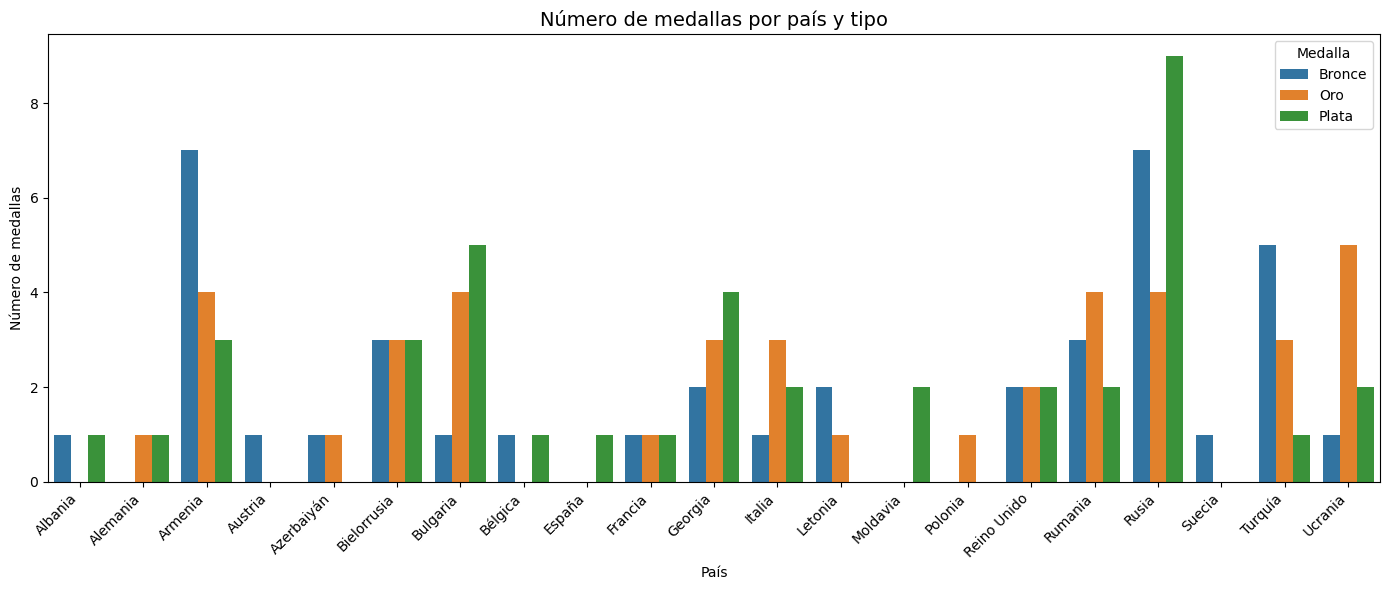

In [355]:
# Agrupar: contar cuántas medallas tiene cada país de cada tipo
medallas_por_pais = df_final_ordenado.groupby(['País', 'Medalla']).size().reset_index(name='Cantidad')

# Crear gráfico de barras
plt.figure(figsize=(14, 6))
sns.barplot(data=medallas_por_pais, x='País', y='Cantidad', hue='Medalla')

# Mejorar presentación
plt.title("Número de medallas por país y tipo", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Número de medallas")
plt.xlabel("País")
plt.tight_layout()
plt.show()

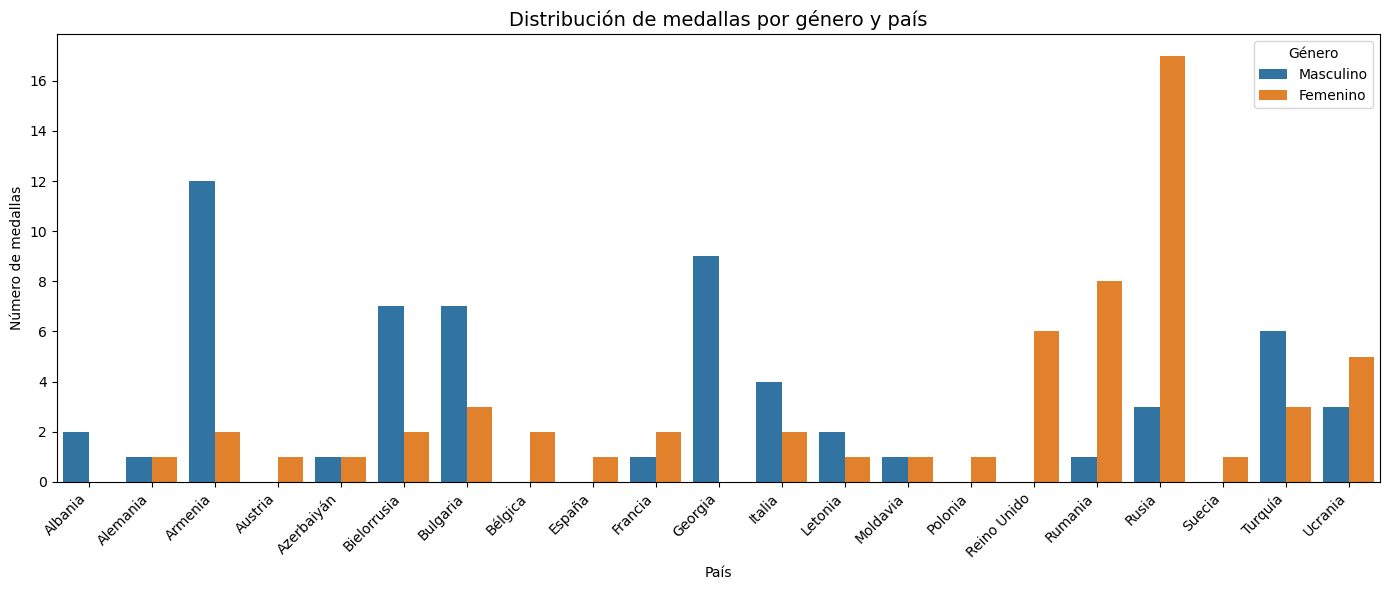

In [356]:
# Agrupar por país y género (contar medallas)
equidad_genero = df_final_ordenado.groupby(['País', 'Género']).size().reset_index(name='Medallas')

# Gráfico de barras agrupadas
plt.figure(figsize=(14, 6))
sns.barplot(data=equidad_genero, x='País', y='Medallas', hue='Género')

# Mejorar presentación
plt.title("Distribución de medallas por género y país", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Número de medallas")
plt.xlabel("País")
plt.tight_layout()
plt.show()

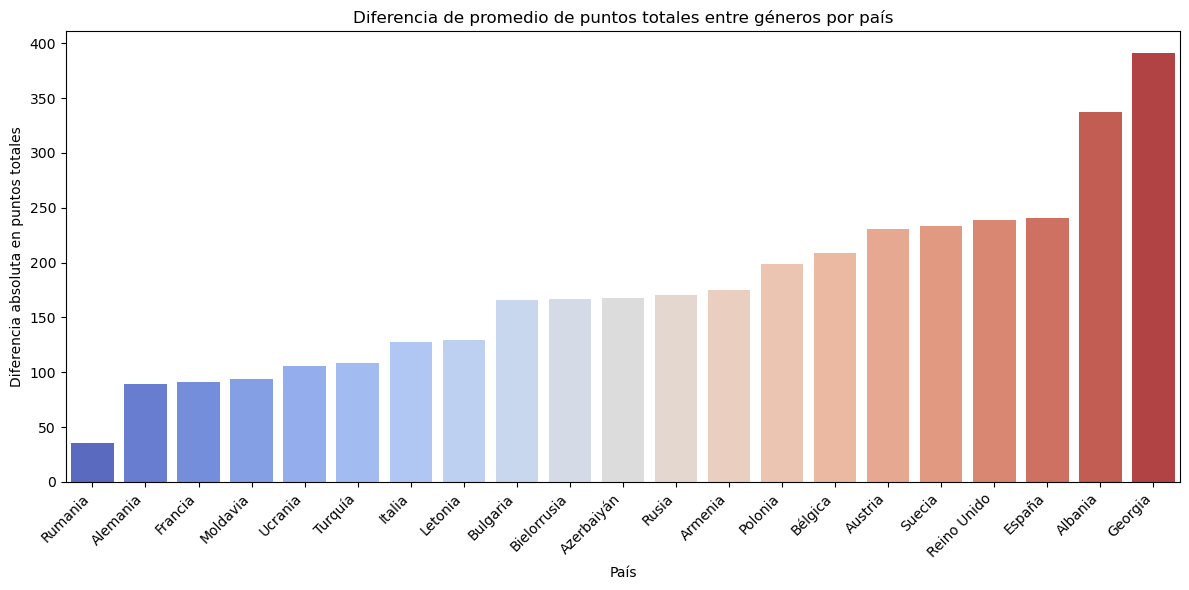

 País con menor diferencia de rendimiento entre géneros: Rumania


In [357]:
# Paso 1 y 2: promedio del Total por país y género
promedio_totales = df_final_ordenado.groupby(['País', 'Género'])['Total'].mean().reset_index()

# Paso 3: pivot para tener columnas por género
pivot = promedio_totales.pivot(index='País', columns='Género', values='Total').fillna(0)

# Paso 4: calcular diferencia absoluta
pivot['Diferencia'] = abs(pivot.get('Femenino', 0) - pivot.get('Masculino', 0))

# Paso 5: ordenar por menor diferencia
pivot_ordenado = pivot.sort_values(by='Diferencia')

# Paso 6: graficar la diferencia
plt.figure(figsize=(12, 6))
sns.barplot(x=pivot_ordenado.index, y=pivot_ordenado['Diferencia'], palette="coolwarm")
plt.title("Diferencia de promedio de puntos totales entre géneros por país")
plt.ylabel("Diferencia absoluta en puntos totales")
plt.xlabel("País")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Ver el país más equitativo
pais_equilibrado = pivot_ordenado['Diferencia'].idxmin()
print(f" País con menor diferencia de rendimiento entre géneros: {pais_equilibrado}")

## 6. Resolución

### **Pregunta 1.** ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)

In [358]:
# Contar todas las medallas por país (independientemente del género o tipo)
medallas_totales = df_final_ordenado.groupby('País').size().reset_index(name='Total_medallas')

# Ordenar de mayor a menor
medallas_totales = medallas_totales.sort_values(by='Total_medallas', ascending=False)

# Mostrar el resultado
print(medallas_totales)

           País  Total_medallas
17        Rusia              20
2       Armenia              14
6      Bulgaria              10
10      Georgia               9
16      Rumania               9
19      Turquía               9
5   Bielorrusia               9
20      Ucrania               8
11       Italia               6
15  Reino Unido               6
9       Francia               3
12      Letonia               3
1      Alemania               2
13     Moldavia               2
7       Bélgica               2
4    Azerbaiyán               2
0       Albania               2
8        España               1
14      Polonia               1
18       Suecia               1
3       Austria               1


### **Pregunta 2.** ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?

In [359]:
# Paso 1: Contar número de medallas por país y género
equidad_genero = df_final_ordenado.groupby(['País', 'Género']).size().reset_index(name='Medallas')

# Paso 2: Convertir a tabla con columnas separadas para Femenino y Masculino
pivot = equidad_genero.pivot(index='País', columns='Género', values='Medallas').fillna(0)

# Paso 3: Calcular diferencia absoluta entre medallas masculinas y femeninas
pivot['Diferencia'] = abs(pivot.get('Masculino', 0) - pivot.get('Femenino', 0))

# Paso 4: Ordenar por menor diferencia (más equitativo primero)
pivot_ordenado = pivot.sort_values(by='Diferencia')

# Paso 5: Mostrar el país más equitativo
pais_mas_equilibrado = pivot_ordenado.index[0]
print(f" País con mayor equidad de género en medallas: {pais_mas_equilibrado}")

 País con mayor equidad de género en medallas: Alemania


### **Pregunta 3.** ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?

In [ ]:
#País con menor diferencia de rendimiento entre géneros: Rumania cómo indica el gráfico superior del EDA

# **Fase 2.** Añadiendo los datos obtenidos mediante Web scraping

## 0. Importación de librerías

- **Paso 0: Importa las librerías necesarias y define funciones**

In [361]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [362]:
import pandas as pd

from bs4 import BeautifulSoup
import requests
import html5lib


## 1. Carga de datos (web scraping) y 2. Exploración inicial

- **He juntado los pasos:**

- **Paso 1: Carga los datos**

- **Paso 2: Realiza una exploración inicial de los datos a analizar**

In [363]:
# Creo un diccionario de url's
urls = {
    2021: "https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2021",
    2022: "https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2022",
    2023: "https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2023",
    2024: "https://es.wikipedia.org/wiki/Campeonato_Europeo_de_Halterofilia_de_2024"
}
dataframes = []
for anio, url in urls.items():
    res = requests.get(url) 
    soup = BeautifulSoup(res.content, 'html.parser')
    tablas = soup.find_all('table', class_='wikitable') 
    tablas_validas = [] 
    for tabla in tablas: 
        try: 
            df = pd.read_html(str(tabla), flavor='bs4')[0] 
            if any('evento' in str(col).lower() for col in df.columns) and df.shape[1] >= 4 and df.shape[0] > 5: 
                tablas_validas.append(df)
        except:
            continue

# Explicación de lo que hay hecho para sacar el primer dataframe extrayendo las tablas de Wikipedia:

# 1.	for tabla in tablas:
#Recorremos una por una todas las tablas HTML encontradas en la página.

# 2.	try:
#Usamos esto para evitar errores. A veces hay tablas mal formadas o vacías que darían problemas al convertirlas a DataFrame. Con try, si hay un error, no se rompe el programa.

# 3.	df = pd.read_html(...)
#Convertimos la tabla HTML a una tabla de pandas (DataFrame) para poder trabajar con ella en Python.

# 4.	if any('evento' in col.lower() ...) and ...
#Filtramos las tablas:
#Deben tener una columna con la palabra “evento” (lo que indica que probablemente sea una tabla de resultados).
#Deben tener al menos 4 columnas y más de 5 filas (para evitar tablas vacías o inútiles).

# 5.	tablas_validas.append(df)
#Si cumple todo lo anterior, la guardamos en la lista tablas_validas, que solo contiene las buenas.

# 6.	except: continue
# Si hubo un error en alguna tabla, la ignoramos y seguimos con la siguiente.

# Alterno género: masculino, femenino, masculino, femenino, porque están en tablas separadas en wikipedia por años.
    generos = ['Masculino', 'Femenino'] * ((len(tablas_validas) // 2) + 1)
    for i, df in enumerate(tablas_validas):
        df['Año'] = anio
        df['Género'] = generos[i]
        dataframes.append(df)
# Concatenar todo
df_segunda_parte = pd.concat(dataframes, ignore_index=True)

# Limpieza de columnas
df_segunda_parte.columns = (
    df_segunda_parte.columns
    .str.strip()                          # 1. Quita espacios al principio y al final
    .str.replace('\n', ' ')              # 2. Sustituye saltos de línea por espacios
    .str.replace(r'\s+', ' ', regex=True) # 3. Reemplaza varios espacios seguidos por uno solo
)
# Mostrar todo --> Código que he pedido a ChatGpt para revisar los datos al completo
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_segunda_parte)
    

,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3,Año,Género
0,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,2021,Masculino
1,61 kg (04.04),Stilian Grozdev Bulgaria 136 + 160 = 296,Shota Mishvelidze Georgia 135 + 155 = 290,Ferdi Hardal Turquía 130 + 157 = 287,2021,Masculino
2,67 kg (05.04),Muhammed Özbek Turquía 145 + 178 = 323,Mirko Zanni Italia 148 + 170 = 318,Valentin Guenchev Bulgaria 138 + 177 = 315,2021,Masculino
3,73 kg (06.04),Daniyar İsmayilov Turquía 160 + 181 = 341,Marin Robu Moldavia 156 + 183 = 339,Briken Calja Albania 152 + 184 = 336,2021,Masculino
4,81 kg (07.04),Antonino Pizzolato Italia 164 + 206 = 370,Karlos Nasar Bulgaria 163 + 206 = 369,Ritvars Suharevs Letonia 157 + 190 = 347,2021,Masculino
5,89 kg (08.04),Karen Avaguian Armenia 175 + 200 = 375,Revaz Davitadze Georgia 171 + 203 = 374,Andranik Karapetian Armenia 170 + 195 = 365,2021,Masculino
6,96 kg (09.04),Anton Pliesnoi Georgia 180 + 213 = 393,Piotr Asayonak Bielorrusia 172 + 202 = 374,Hakob Mkrtchian Armenia 160 + 212 = 372,2021,Masculino
7,102 kg (10.04),Samvel Gasparian Armenia 176 +214 = 390,Arsen Martirosian Armenia 171 + 209 = 380,Dadaş Dadaşbəyli Azerbaiyán 177 + 202 = 379,2021,Masculino
8,109 kg (10.04),Dmytro Chumak Ucrania 181 + 226 = 407,Jristo Jristov Bulgaria 186 + 220 = 406,Timur Naniyev Rusia 184 + 217 = 401,2021,Masculino
9,+109 kg (11.04),Lasha Talajadze Georgia 222 + 263 = 485,Gor Minasian Armenia 216 + 248 = 464,Varazdat Lalayan Armenia 205 + 240 = 445,2021,Masculino


## 3. Limpieza de datos y 4. Transformación de datos

- **Paso 3: Comprueba que los datos no contengan valores problemáticos**

In [364]:
check_df(df_segunda_parte)

¿Cuántas filas y columnas hay en el conjunto de datos?
¿Cuántas filas y columnas hay en el conjunto de datos?
	Hay 80 filas y 6 columnas.

########################################################################################
¿Cuáles son las primeras cinco filas del conjunto de datos?


,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3,Año,Género
0,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,2021,Masculino
1,61 kg (04.04),Stilian Grozdev Bulgaria 136 + 160 = 296,Shota Mishvelidze Georgia 135 + 155 = 290,Ferdi Hardal Turquía 130 + 157 = 287,2021,Masculino
2,67 kg (05.04),Muhammed Özbek Turquía 145 + 178 = 323,Mirko Zanni Italia 148 + 170 = 318,Valentin Guenchev Bulgaria 138 + 177 = 315,2021,Masculino
3,73 kg (06.04),Daniyar İsmayilov Turquía 160 + 181 = 341,Marin Robu Moldavia 156 + 183 = 339,Briken Calja Albania 152 + 184 = 336,2021,Masculino
4,81 kg (07.04),Antonino Pizzolato Italia 164 + 206 = 370,Karlos Nasar Bulgaria 163 + 206 = 369,Ritvars Suharevs Letonia 157 + 190 = 347,2021,Masculino



########################################################################################
¿Cuáles son las últimas cinco filas del conjunto de datos?


,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3,Año,Género
75,71 kg (16.02),Loredana Toma Rumania 114 + 127 = 241,Siuzanna Valodzka AIN[a 1]​ 105 + 130 = 235,Lisa Marie Schweizer Alemania 107 + 124 = 231,2024,Femenino
76,76 kg (17.02),Genna Toko Kegne Italia 101 + 120 = 221,Nikol Rubanovich Israel 99 + 117 = 216,Lara Dancz Alemania 101 + 114 = 215,2024,Femenino
77,81 kg (18.02),Weronika Zielińska-Stubińska Polonia 103 + 13...,Elena Erighina Moldavia 103+ 131 = 234,Dilara Narin Turquía 97 + 125 = 222,2024,Femenino
78,87 kg (19.02),Solfrid Koanda Noruega 120 + 160 = 280,Anastasiya Manievska Ucrania 102 + 128 = 230,Hripsime Jurshudian Armenia 105 + 122 = 227,2024,Femenino
79,+87 kg (20.02),Emily Campbell Reino Unido 112 + 151 = 263,Anastasiya Hotfrid Georgia 117 + 140 = 257,Fatmagül Çevik Turquía 107 + 131 = 238,2024,Femenino



########################################################################################
¿Cómo puedes obtener una muestra aleatoria de filas del conjunto de datos?


,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3,Año,Género
64,81 kg (16.02),Oscar Reyes Martínez Italia 155 + 191 = 346,Kristi Ramadani Albania 151 + 190 = 341,Rafik Harutiunian Armenia 154 + 182 = 336,2024,Masculino
35,71 kg (01.06),Patricia Strenius Suecia 94 + 130 = 224,Lisa Marie Schweizer Alemania 103 + 120 = 223,Monika Marach Polonia 99 + 116 = 215,2022,Femenino
62,67 kg (14.02),Gor Sahakian Armenia 140 + 171 = 311,Kaan Kahriman Turquía 142 + 168 = 310,Ferdi Hardal Turquía 135 + 169 = 304,2024,Masculino
67,102 kg (19.02),Yauheni Tsijantsou AIN[a 1]​ 181 + 217 = 398,Samvel Gasparian Armenia 180 + 216 = 396,Garik Karapetian Armenia 182 + 212 = 394,2024,Masculino
17,81 kg (09.04),Alina Marushchak Ucrania 109 + 127 = 236,Gaëlle Nayo-Ketchanke Francia 100 + 131 = 231,Liana Guiurdzhian Armenia 98 + 129 = 227,2021,Femenino



########################################################################################
¿Cuáles son las columnas del conjunto de datos? ¿Cuál es el tipo de datos de cada columna?
Evento        object
Unnamed: 1    object
Unnamed: 2    object
Unnamed: 3    object
Año            int64
Género        object
dtype: object

########################################################################################
¿Cuántas columnas hay de cada tipo de datos?
object    5
int64     1
Name: count, dtype: int64

########################################################################################
¿Cuáles son las variables numéricas?
['Año']

########################################################################################
¿Cuáles son las variables categóricas?
['Evento', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Género']

########################################################################################
¿Cuántos valores únicos tiene cada columna?
Evento        76
Unnamed: 1    80

,Año
count,80.000000
mean,2022.500000
std,1.125088
min,2021.000000
25%,2021.750000
50%,2022.500000
75%,2023.250000
max,2024.000000



########################################################################################
¿Cuáles son las estadísticas descriptivas básicas de las columnas categóricas?


,Evento,Unnamed: 1,Unnamed: 2,Unnamed: 3,Género
count,80,80,80,80,80
unique,76,80,80,80,2
top,55 kg (04.04),Anguel Rusev Bulgaria 111 + 147 = 258[n 1]​,Valentin Iancu Rumania 108 + 140 = 248[n 1]​,Dmytro Voronovsky Ucrania 110 + 137 = 247[n 1]​,Masculino
freq,2,1,1,1,40


In [365]:
# Reorganizamos las columnas que tienen los nombres de los deportistas y sus resultados
# (aparecían como "Unnamed: 1", "Unnamed: 2", etc.) en una sola columna llamada "Texto".
# Así es más fácil limpiar los datos y separarlos después.
df_melted = df_segunda_parte.melt(
    id_vars=["Evento", "Año", "Género"], 
    value_vars=["Unnamed: 1", "Unnamed: 2", "Unnamed: 3"],
    var_name="ColumnaOriginal", 
    value_name="Texto"
)

# Eliminar anotaciones como [n 1] y caracteres invisibles y duplicados de caracteres invisibles
df_melted["Texto"] = (
    df_melted["Texto"]
    .astype(str)
    .str.replace(r"\[.*?\]", "", regex=True)
    .str.replace("\u200b", " ")
    .str.replace("\xa0", " ")
    .str.strip()
    .replace(r'\s+', ' ', regex=True)
)

# Buscamos puntuaciones en la columna "Texto" con el formato "arrancada + dos tiempos = total".
# Extraemos esos tres números y los guardamos en nuevas columnas: "Arrancada", "Dos_Tiempos" y "Total".
# Convertimos esos valores a tipo float para poder analizarlos o hacer cálculos.
pattern = r'(\d+)\s*\+\s*(\d+)\s*=\s*(\d+)'
resultados = df_melted["Texto"].str.extract(pattern) #Usamos pattern para buscar repeticiones o patrones en el texto, en este caso los numeros.
df_melted["Arrancada"] = resultados[0].astype(float)
df_melted["Dos_Tiempos"] = resultados[1].astype(float)
df_melted["Total"] = resultados[2].astype(float)

# Eliminar la parte de puntuación para extraer nombre y país
df_melted["Texto_Limpio"] = df_melted["Texto"].str.replace(pattern, "", regex=True).str.strip()

# Extraer nombre, apellido, país (respetando nombres compuestos y Reino Unido)
def extraer_nombre_apellido_pais(texto):
    texto = str(texto).strip()
    texto = re.sub(r'\s+', ' ', texto.replace('\u200b', ' ').replace('\xa0', ' '))
    partes = texto.split()
    if len(partes) < 3:
        return "", "", ""
    nombre = partes[0]
    if partes[-2:] == ["Reino", "Unido"]:
        pais = "Reino Unido"
        apellido = " ".join(partes[1:-2])
    else:
        pais = partes[-1]
        apellido = " ".join(partes[1:-1])
    return pd.Series([nombre, apellido, pais])

df_melted[["Nombre", "Apellido", "Pais"]] = df_melted["Texto_Limpio"].apply(extraer_nombre_apellido_pais)

# Añadir columna 'Medalla' según el orden en cada evento
df_melted["OrdenEnEvento"] = df_melted.groupby(["Evento", "Año", "Género"]).cumcount()
df_melted["Medalla"] = df_melted["OrdenEnEvento"].map({0: "Oro", 1: "Plata", 2: "Bronce"})

# Crear DataFrame final con Medalla incluida
df_limpio_segunda_parte = df_melted[[
    "Género", "Evento", "Año", "Medalla", "Nombre", "Apellido", "Pais", "Arrancada", "Dos_Tiempos", "Total"
]]

# --- NUEVAS LÍNEAS: limpieza de Evento y Año ---

# Quitar espacios en blanco al inicio y final de la columna Evento
df_limpio_segunda_parte["Evento"] = df_limpio_segunda_parte["Evento"].str.strip()

df_limpio_segunda_parte

,Género,Evento,Año,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_Tiempos,Total
0,Masculino,55 kg (04.04),2021,Oro,Anguel,Rusev,Bulgaria,111.0,147.0,258.0
1,Masculino,61 kg (04.04),2021,Oro,Stilian,Grozdev,Bulgaria,136.0,160.0,296.0
2,Masculino,67 kg (05.04),2021,Oro,Muhammed,Özbek,Turquía,145.0,178.0,323.0
3,Masculino,73 kg (06.04),2021,Oro,Daniyar,İsmayilov,Turquía,160.0,181.0,341.0
4,Masculino,81 kg (07.04),2021,Oro,Antonino,Pizzolato,Italia,164.0,206.0,370.0
...,...,...,...,...,...,...,...,...,...,...
235,Femenino,71 kg (16.02),2024,Bronce,Lisa,Marie Schweizer,Alemania,107.0,124.0,231.0
236,Femenino,76 kg (17.02),2024,Bronce,Lara,Dancz,Alemania,101.0,114.0,215.0
237,Femenino,81 kg (18.02),2024,Bronce,Dilara,Narin,Turquía,97.0,125.0,222.0
238,Femenino,87 kg (19.02),2024,Bronce,Hripsime,Jurshudian,Armenia,105.0,122.0,227.0


- **Paso 4: Crea un único dataframe con los datos de 2019 en adelante**

In [366]:
# Cargar archivos que he exportado para empezar a juntarlo todo nuevamente
df1 = pd.read_csv("medallero_europeo_ordenado.csv")
df2 = pd.read_csv("/Users/ramitafrita/Documents/Master Nuclio Data Analytics/Data Analytics M4 Lara 2025/Entregable M4 Lara/campeonato_halterofilia_2021_2024_ordenado.csv")

# Renombrar columnas en df1
df1.rename(columns={
    "Categoría": "Evento",
    "País": "Pais",
    "Fecha": "Año",
    "Dos_tiempos": "Dos_Tiempos"
}, inplace=True)

# Asegurar que df2 tenga columna 'Medalla'
if "Medalla" not in df2.columns:
    df2["Medalla"] = None

# Normalizar columna "Año" (ej: "2022-04-11" → 2022)
for df in [df1, df2]:
    df["Año"] = df["Año"].astype(str).str.extract(r"(\d{4})")
    df["Año"] = df["Año"].astype(int)

# Reordenar columnas
columnas_finales = [
    "Evento", "Año", "Género", "Medalla",
    "Nombre", "Apellido", "Pais", "Arrancada", "Dos_Tiempos", "Total"
]
df1 = df1[columnas_finales]
df2 = df2[columnas_finales]

# Limpiar espacios
for df in [df1, df2]:
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype(str).str.strip()

# Unir ambos datasets
df_2019_2024 = pd.concat([df1, df2], ignore_index=True)

# Verificar filas
print(f" El df final tiene {len(df_2019_2024)} filas")

 El df final tiene 360 filas


In [367]:
df_2019_2024

,Evento,Año,Género,Medalla,Nombre,Apellido,Pais,Arrancada,Dos_Tiempos,Total
0,+87 kg,2019,Femenino,Bronce,Emily,Campbell,Reino Unido,115.0,145.0,260.0
1,+87 kg,2020,Femenino,Bronce,Melike,Günal,Turquía,108.0,135.0,243.0
2,+87 kg,2019,Femenino,Oro,Tatiana,Kashirina,Rusia,146.0,185.0,331.0
3,+87 kg,2020,Femenino,Oro,Emily,Campbell,Reino Unido,122.0,154.0,276.0
4,+87 kg,2019,Femenino,Plata,Anastasiya,Lysenko,Ucrania,120.0,148.0,268.0
...,...,...,...,...,...,...,...,...,...,...
355,71 kg (16.02),2024,Femenino,Bronce,Lisa,Marie Schweizer,Alemania,107.0,124.0,231.0
356,76 kg (17.02),2024,Femenino,Bronce,Lara,Dancz,Alemania,101.0,114.0,215.0
357,81 kg (18.02),2024,Femenino,Bronce,Dilara,Narin,Turquía,97.0,125.0,222.0
358,87 kg (19.02),2024,Femenino,Bronce,Hripsime,Jurshudian,Armenia,105.0,122.0,227.0


In [368]:
# Exporto otro archivo para que esté todo en un csv y empezar de nuevo con ese csv

df_2019_2024.to_csv("archivo_final_ordenado_2019_2024.csv", index=False)

- **Paso 5: Transforma el DataFrame para tener las siguientes columnas: Eventos, Año, Genero, Medalla (que indica si es Oro, Plata o Bronce) y Atleta (que contiene la información del atleta correspondiente)**

    Formato inicial:

    | Eventos | Oro | Plata | Bronce | Año | Género |
    |---------|-----|-------|--------|-----|--------|

    **¡Importante!**
    El dataframe final debe tener este formato:

    | Eventos | Año | Genero | Medalla | Atleta |
    |---------|-----|-------|--------|-----|

In [369]:
# Cargar el archivo ya en formato largo
df = pd.read_csv("archivo_final_ordenado_2019_2024.csv")

# Crear columna Atleta con Nombre + Apellido
df["Atleta"] = df["Nombre"].astype(str).str.strip() + " " + df["Apellido"].astype(str).str.strip()

# Renombrar columnas porque tienen diferencia en sus nombres
df = df.rename(columns={"Evento": "Eventos", "Género": "Genero"})

# Seleccionar columnas finales según el enunciado
df_formato_nuevo = df[["Eventos", "Año", "Genero", "Medalla", "Atleta"]]

df_formato_nuevo

,Eventos,Año,Genero,Medalla,Atleta
0,+87 kg,2019,Femenino,Bronce,Emily Campbell
1,+87 kg,2020,Femenino,Bronce,Melike Günal
2,+87 kg,2019,Femenino,Oro,Tatiana Kashirina
3,+87 kg,2020,Femenino,Oro,Emily Campbell
4,+87 kg,2019,Femenino,Plata,Anastasiya Lysenko
...,...,...,...,...,...
355,71 kg (16.02),2024,Femenino,Bronce,Lisa Marie Schweizer
356,76 kg (17.02),2024,Femenino,Bronce,Lara Dancz
357,81 kg (18.02),2024,Femenino,Bronce,Dilara Narin
358,87 kg (19.02),2024,Femenino,Bronce,Hripsime Jurshudian


- **Paso 6: Crea las siguientes columnas:**
    - Fecha
    - Nombre
    - Apellido
    - País
    - Resultados
    - Arrancada
    - Dos tiempos
    - Total

In [370]:
#Uso un df limpio anterior ya que el que hemos creado es sin las columnas que necesito

# Cargar el archivo CSV si fuera necesario, pero ya tenemos el df creado.
# df_2019_2024 = pd.read_csv("archivo_final_ordenado_2019_2024.csv")

# Crear la columna 'Fecha' a partir del año
df_2019_2024["Fecha"] = df_2019_2024["Año"]

# Crear la columna 'País' (a partir de 'Pais', unificando el nombre con tilde)
df_2019_2024["País"] = df_2019_2024["Pais"]

# Crear la columna 'Resultados' en formato: "Arrancada + Dos tiempos = Total" otra vez todo junto
df_2019_2024["Resultados"] = (
    df_2019_2024["Arrancada"].astype(int).astype(str) + " + " +
    df_2019_2024["Dos_Tiempos"].astype(int).astype(str) + " = " +
    df_2019_2024["Total"].astype(int).astype(str)
)

# Renombrar columna 'Dos_Tiempos' a 'Dos tiempos' sin barra baja
df_2019_2024 = df_2019_2024.rename(columns={"Dos_Tiempos": "Dos tiempos"})

# Seleccionar solo las columnas requeridas
columnas_paso6 = [
    "Fecha", "Nombre", "Apellido", "País",
    "Resultados", "Arrancada", "Dos tiempos", "Total"
]

df_paso6 = df_2019_2024[columnas_paso6] #empiezo a nombrar los df muy mal porque ya no tengo más ideas
df_paso6

,Fecha,Nombre,Apellido,País,Resultados,Arrancada,Dos tiempos,Total
0,2019,Emily,Campbell,Reino Unido,115 + 145 = 260,115.0,145.0,260.0
1,2020,Melike,Günal,Turquía,108 + 135 = 243,108.0,135.0,243.0
2,2019,Tatiana,Kashirina,Rusia,146 + 185 = 331,146.0,185.0,331.0
3,2020,Emily,Campbell,Reino Unido,122 + 154 = 276,122.0,154.0,276.0
4,2019,Anastasiya,Lysenko,Ucrania,120 + 148 = 268,120.0,148.0,268.0
...,...,...,...,...,...,...,...,...
355,2024,Lisa,Marie Schweizer,Alemania,107 + 124 = 231,107.0,124.0,231.0
356,2024,Lara,Dancz,Alemania,101 + 114 = 215,101.0,114.0,215.0
357,2024,Dilara,Narin,Turquía,97 + 125 = 222,97.0,125.0,222.0
358,2024,Hripsime,Jurshudian,Armenia,105 + 122 = 227,105.0,122.0,227.0


- **Paso 7: Filtrado de columnas y ordenación**

    **¡Importante!**
    El dataframe final debe contener exclusivamente las siguientes columnas:

    | Género    | Categoría | Fecha | Medalla | Nombre | Apellido | País | Arrancada | Dos tiempos | Total |
    |-----------|-----------|-------|---------|--------|----------|------|-----------|-------------|-------|

In [371]:
df_2019_2024.to_csv("archivo_final_ordenado_2019_2024-reordenado-paso7.csv", index=False)

In [372]:
# Cargar el archivo original
df = pd.read_csv("archivo_final_ordenado_2019_2024-reordenado-paso7.csv")

# Renombrar la columna 'Evento' a 'Categoría'
df = df.rename(columns={"Evento": "Categoría"})

# Eliminar columna duplicada si existe ('Fecha' repetida)
df = df.loc[:, ~df.columns.duplicated()]

# Seleccionar las columnas finales en el orden correcto
columnas_paso7 = [
    "Género", "Categoría", "Fecha", "Medalla",
    "Nombre", "Apellido", "País",
    "Arrancada", "Dos tiempos", "Total"
]

df_paso7 = df[columnas_paso7]

In [373]:
df_paso7

,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
0,Femenino,+87 kg,2019,Bronce,Emily,Campbell,Reino Unido,115.0,145.0,260.0
1,Femenino,+87 kg,2020,Bronce,Melike,Günal,Turquía,108.0,135.0,243.0
2,Femenino,+87 kg,2019,Oro,Tatiana,Kashirina,Rusia,146.0,185.0,331.0
3,Femenino,+87 kg,2020,Oro,Emily,Campbell,Reino Unido,122.0,154.0,276.0
4,Femenino,+87 kg,2019,Plata,Anastasiya,Lysenko,Ucrania,120.0,148.0,268.0
...,...,...,...,...,...,...,...,...,...,...
355,Femenino,71 kg (16.02),2024,Bronce,Lisa,Marie Schweizer,Alemania,107.0,124.0,231.0
356,Femenino,76 kg (17.02),2024,Bronce,Lara,Dancz,Alemania,101.0,114.0,215.0
357,Femenino,81 kg (18.02),2024,Bronce,Dilara,Narin,Turquía,97.0,125.0,222.0
358,Femenino,87 kg (19.02),2024,Bronce,Hripsime,Jurshudian,Armenia,105.0,122.0,227.0


- **Paso 8: Trasformación del tipo de datos. Los tipos de las columnas deben ser los siguientes:**

    - **Género**: `object`
    - **Categoría**: `object`/`int64`
    - **Fecha**: `datetime64[ns]`
    - **Medalla**: `category`
    - **Nombre**: `object`
    - **Apellido**: `object`
    - **País**: `object`
    - **Arrancada**: `int64`
    - **Dos tiempos**: `int64`
    - **Total**: `int64`

In [374]:
# Cargar el archivo original y nombro el df ahora sí cómo df_FINAL
df_FINAL = pd.read_csv("archivo_final_ordenado_2019_2024-reordenado-paso7.csv")

# Renombrar columnas si es necesario
df_FINAL = df_FINAL.rename(columns={"Evento": "Categoría"})

# Eliminar columnas duplicadas (como 'Fecha' si aparece más de una vez)
df_FINAL = df_FINAL.loc[:, ~df_FINAL.columns.duplicated()]

# Seleccionar columnas según el Paso 7
columnas_objetivo = [
    "Género", "Categoría", "Fecha", "Medalla",
    "Nombre", "Apellido", "País",
    "Arrancada", "Dos tiempos", "Total"
]
df_FINAL = df_FINAL[columnas_objetivo].copy()

#: Paso 8: Transformar tipos de datos
df_FINAL["Género"] = df_FINAL["Género"].astype("object")
df_FINAL["Categoría"] = df_FINAL["Categoría"].astype("object")

# Corregimos formato de Fecha usando el año como base
# Si 'Fecha' originalmente es solo el año (2020, 2021...), lo convertimos así:
df_FINAL["Fecha"] = pd.to_datetime(df_FINAL["Fecha"].astype(str), format="%Y", errors="coerce")

# Cambiamos los tipos del resto de columnas
df_FINAL["Medalla"] = df_FINAL["Medalla"].astype("category")
df_FINAL["Nombre"] = df_FINAL["Nombre"].astype("object")
df_FINAL["Apellido"] = df_FINAL["Apellido"].astype("object")
df_FINAL["País"] = df_FINAL["País"].astype("object")
df_FINAL["Arrancada"] = df_FINAL["Arrancada"].astype("int64")
df_FINAL["Dos tiempos"] = df_FINAL["Dos tiempos"].astype("int64")
df_FINAL["Total"] = df_FINAL["Total"].astype("int64")

- **Paso 9: Ordena el conjunto de datos por las siguientes columnas:
['Genero', 'Categoria', 'Medalla']**

In [375]:
# Ordenar el DataFrame por ['Genero', 'Categoría', 'Medalla']
df_FINAL_ordenado_dos = df_FINAL.sort_values(
    by=["Género", "Categoría", "Medalla"]
).reset_index(drop=True)

# Ver las primeras filas ordenadas
print(df_FINAL_ordenado_dos.head())
#df_FINAL_ordenado
df_FINAL_ordenado_dos

# Mostrar todo --> Código que he pedido a ChatGpt para revisar los datos al completo
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_FINAL_ordenado_dos)

     Género Categoría      Fecha Medalla      Nombre   Apellido         País  \
0  Femenino    +87 kg 2019-01-01  Bronce       Emily   Campbell  Reino Unido   
1  Femenino    +87 kg 2020-01-01  Bronce      Melike      Günal      Turquía   
2  Femenino    +87 kg 2019-01-01     Oro     Tatiana  Kashirina        Rusia   
3  Femenino    +87 kg 2020-01-01     Oro       Emily   Campbell  Reino Unido   
4  Femenino    +87 kg 2019-01-01   Plata  Anastasiya    Lysenko      Ucrania   

   Arrancada  Dos tiempos  Total  
0        115          145    260  
1        108          135    243  
2        146          185    331  
3        122          154    276  
4        120          148    268  


,Género,Categoría,Fecha,Medalla,Nombre,Apellido,País,Arrancada,Dos tiempos,Total
0,Femenino,+87 kg,2019-01-01,Bronce,Emily,Campbell,Reino Unido,115,145,260
1,Femenino,+87 kg,2020-01-01,Bronce,Melike,Günal,Turquía,108,135,243
2,Femenino,+87 kg,2019-01-01,Oro,Tatiana,Kashirina,Rusia,146,185,331
3,Femenino,+87 kg,2020-01-01,Oro,Emily,Campbell,Reino Unido,122,154,276
4,Femenino,+87 kg,2019-01-01,Plata,Anastasiya,Lysenko,Ucrania,120,148,268
5,Femenino,+87 kg,2020-01-01,Plata,Anastasiya,Lysenko,Ucrania,116,136,252
6,Femenino,+87 kg (05.06),2022-01-01,Bronce,Sarah,Fischer,Austria,102,128,230
7,Femenino,+87 kg (05.06),2022-01-01,Oro,Emily,Campbell,Reino Unido,118,153,271
8,Femenino,+87 kg (05.06),2022-01-01,Plata,Melike,Günal,Turquía,108,134,242
9,Femenino,+87 kg (11.04),2021-01-01,Bronce,Melike,Günal,Turquía,108,135,243


## 5. EDA

- **Paso 10: Realiza un análisis exploratorio de los datos (EDA) que te permita ganar conocimiento sobre el conjunto de datos antes de resolver a las preguntas**


In [377]:
# En el EDA hago un análisis de datos interesantes en relacion a mejor atleta o qué paises tienen más medallas según el año y la evolucion de los paises según el año.

In [378]:
# Pais con mejor atleta:

# Encontrar la fila del mejor Total
fila_mejor_total = df.loc[df['Total'].idxmax()]
# Imprimir el país, nombre y total
print("El país con el mejor Total es:", fila_mejor_total['País'])
print("El deportista es:", fila_mejor_total['Nombre'], fila_mejor_total['Apellido'])
print("El Total levantado es:", fila_mejor_total['Total'])

El país con el mejor Total es: Georgia
El deportista es: Lasha Talajadze
El Total levantado es: 485.0


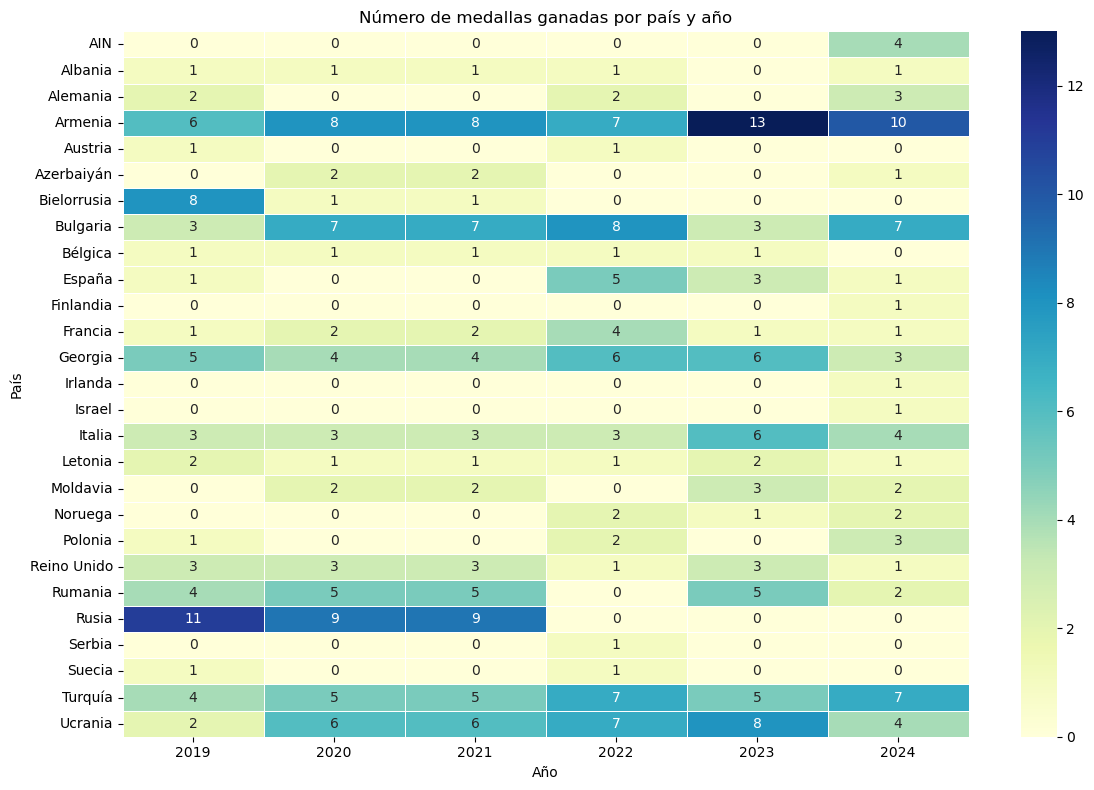

In [379]:
 # Asegurar que 'Año' esté como entero
df_FINAL_ordenado_dos['Año'] = pd.to_datetime(df_FINAL_ordenado_dos['Fecha'], errors='coerce').dt.year
# Filtrar solo filas con medalla y contar por país y año
medallas_por_pais_anio = df_FINAL_ordenado_dos[df_FINAL_ordenado_dos['Medalla'].notna()]
medallas_count = medallas_por_pais_anio.groupby(['País', 'Año']).size().unstack(fill_value=0)
# Gráfico de calor
plt.figure(figsize=(12, 8))
sns.heatmap(medallas_count, cmap="YlGnBu", linewidths=0.5, annot=True, fmt='d')
plt.title("Número de medallas ganadas por país y año")
plt.xlabel("Año")
plt.ylabel("País")
plt.tight_layout()
plt.show()

In [380]:
# QUIERO SABER LA EVOLUCION DE LOS PAISES Y SACAR CUAL ES EL QUE HA MEJORADO MAS Y CUAL EL QUE HA EMPEORADO O SE HA MANTENIDO MAS EN REALCION A LAS MEDALLAS

# Filtrar solo los años 2019 y 2024
df_medallas = df_FINAL_ordenado_dos[df_FINAL_ordenado_dos['Año'].isin([2019, 2024])]

# Crear una tabla de conteo de medallas por país y año
conteo_medallas = df_medallas.groupby(['País', 'Año'])['Medalla'].count().unstack(fill_value=0)

# Calcular la evolución en número de medallas
conteo_medallas['Evolucion'] = conteo_medallas[2024] - conteo_medallas[2019]

# Encontrar el país con la mejor evolución
pais_mejor_medallas = conteo_medallas['Evolucion'].idxmax()
print("El país con la mejor evolución en medallas es:", pais_mejor_medallas)

# Encontrar el país con la peor evolución
pais_peor_medallas = conteo_medallas['Evolucion'].idxmin()
print("El país con la peor evolución en medallas es:", pais_peor_medallas)

# (Opcional) Mostrar tabla completa ordenada por evolución
print("\nTabla de evolución de medallas por país:")
print(conteo_medallas.sort_values('Evolucion', ascending=False))

El país con la mejor evolución en medallas es: AIN
El país con la peor evolución en medallas es: Rusia

Tabla de evolución de medallas por país:
Año          2019  2024  Evolucion
País                              
AIN             0     4          4
Bulgaria        3     7          4
Armenia         6    10          4
Turquía         4     7          3
Polonia         1     3          2
Noruega         0     2          2
Moldavia        0     2          2
Ucrania         2     4          2
Irlanda         0     1          1
Finlandia       0     1          1
Alemania        2     3          1
Israel          0     1          1
Italia          3     4          1
Azerbaiyán      0     1          1
Francia         1     1          0
Albania         1     1          0
España          1     1          0
Austria         1     0         -1
Suecia          1     0         -1
Bélgica         1     0         -1
Letonia         2     1         -1
Reino Unido     3     1         -2
Rumania        

El país con la mejor evolución en medallas es: AIN
El país con la peor evolución en medallas es: Rusia


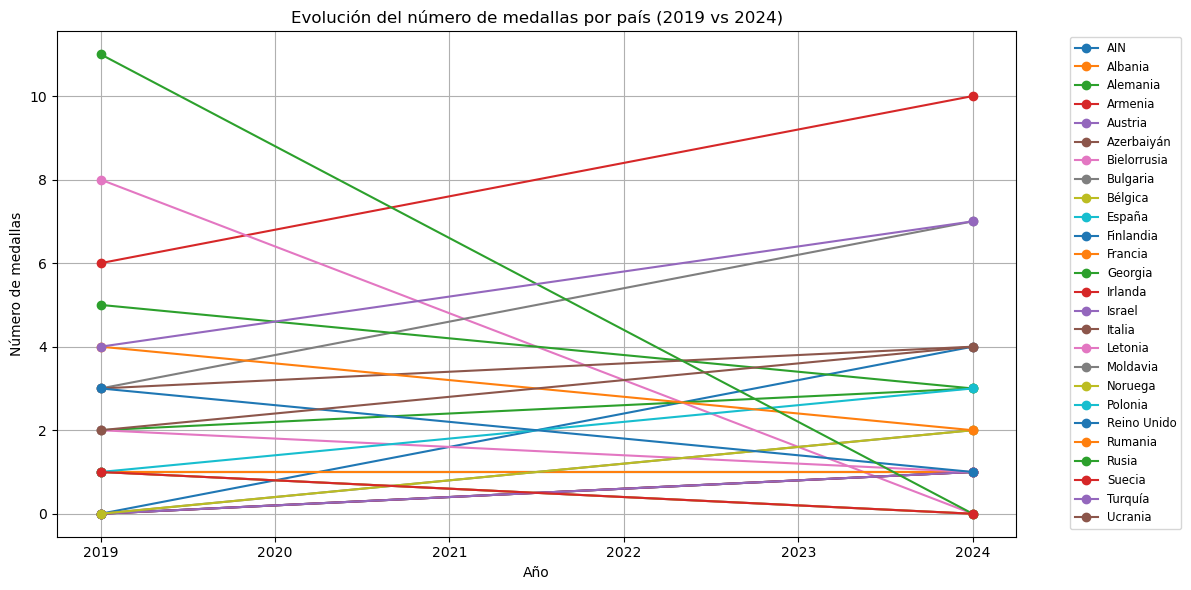

In [381]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar solo los años 2019 y 2024
df_medallas = df_FINAL_ordenado_dos[df_FINAL_ordenado_dos['Año'].isin([2019, 2024])]

# Crear una tabla de conteo de medallas por país y año
conteo_medallas = df_medallas.groupby(['País', 'Año'])['Medalla'].count().unstack(fill_value=0)

# Calcular la evolución en número de medallas
conteo_medallas['Evolucion'] = conteo_medallas[2024] - conteo_medallas[2019]

# Encontrar el país con la mejor evolución
pais_mejor_medallas = conteo_medallas['Evolucion'].idxmax()
print("El país con la mejor evolución en medallas es:", pais_mejor_medallas)

# Encontrar el país con la peor evolución
pais_peor_medallas = conteo_medallas['Evolucion'].idxmin()
print("El país con la peor evolución en medallas es:", pais_peor_medallas)

# Gráfico de líneas de la evolución de medallas
plt.figure(figsize=(12, 6))

for pais in conteo_medallas.index:
    plt.plot([2019, 2024], [conteo_medallas.loc[pais, 2019], conteo_medallas.loc[pais, 2024]], marker='o', label=pais)

plt.title('Evolución del número de medallas por país (2019 vs 2024)')
plt.xlabel('Año')
plt.ylabel('Número de medallas')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

## 6. Resolución

### **Pregunta 1.** ¿Cuántas medallas de cada tipo (oro, plata y bronce) ha ganado cada país en la competición? (Sin considerar el género)

In [382]:
# Contar cuántas medallas de cada tipo ha ganado cada país (sin considerar el género)
medallas_por_pais = df_FINAL_ordenado_dos.groupby(['País', 'Medalla']).size().unstack(fill_value=0)
# Mostrar los resultados
print("Medallas por país y tipo (sin considerar género):")
print(medallas_por_pais)

Medallas por país y tipo (sin considerar género):
Medalla      Bronce  Oro  Plata
País                           
AIN               2    1      1
Albania           2    1      2
Alemania          3    1      3
Armenia          21   16     15
Austria           2    0      0
Azerbaiyán        2    3      0
Bielorrusia       3    3      4
Bulgaria          6   18     11
Bélgica           3    0      2
España            5    0      5
Finlandia         1    0      0
Francia           4    4      3
Georgia           5    8     15
Irlanda           1    0      0
Israel            0    0      1
Italia            3    9     10
Letonia           5    2      1
Moldavia          4    0      5
Noruega           2    3      0
Polonia           3    2      1
Reino Unido       4    7      3
Rumania           6   11      4
Rusia            11    5     13
Serbia            1    0      0
Suecia            1    1      0
Turquía          14   10      9
Ucrania           6   15     12


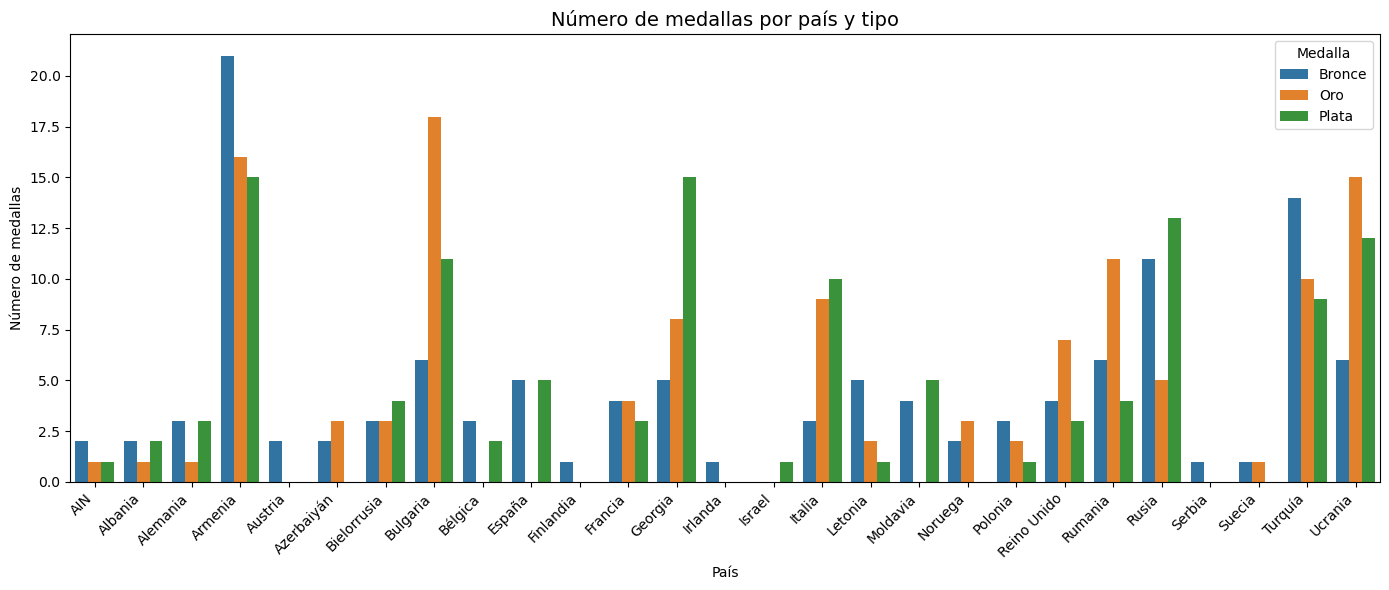

In [383]:
# Agrupar y contar medallas por país y tipo
medallas_por_pais = df_FINAL_ordenado_dos.groupby(['País', 'Medalla']).size().reset_index(name='Cantidad')
# Crear gráfico de barras agrupadas
plt.figure(figsize=(14, 6))
sns.barplot(data=medallas_por_pais, x='País', y='Cantidad', hue='Medalla')
plt.title("Número de medallas por país y tipo", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Número de medallas")
plt.xlabel("País")
plt.tight_layout()
plt.show()

### **Pregunta 2.** ¿Qué país ha logrado la mayor equidad en términos de éxito entre sus atletas femeninos y masculinos?

In [384]:
# Contar número de medallas por país y género
equidad_genero = df_FINAL_ordenado.groupby(['País', 'Género']).size().unstack(fill_value=0)
# Calcular diferencia absoluta entre medallas masculinas y femeninas
equidad_genero['Diferencia'] = abs(equidad_genero.get('Masculino', 0) - equidad_genero.get('Femenino', 0))
# Ordenar por menor diferencia (más equitativo primero)
equidad_ordenado = equidad_genero.sort_values(by='Diferencia')
# Mostrar el país más equitativo
pais_mas_equilibrado = equidad_ordenado.index[0]
print(f"País con mayor equidad de género en medallas: {pais_mas_equilibrado}")

País con mayor equidad de género en medallas: Irlanda


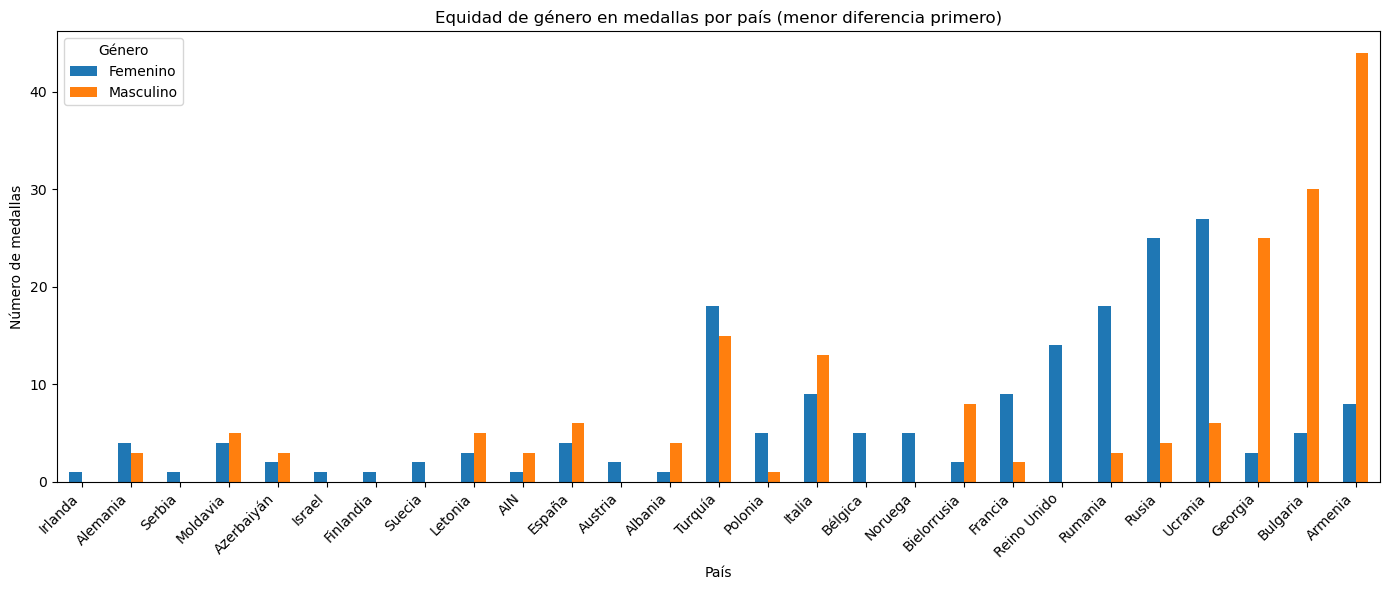

In [385]:
# Repetimos el agrupamiento por si no se ha ejecutado antes
equidad_genero = df_FINAL_ordenado_dos.groupby(['País', 'Género']).size().unstack(fill_value=0)
# Calcular diferencia absoluta entre géneros
equidad_genero['Diferencia'] = abs(equidad_genero.get('Masculino', 0) - equidad_genero.get('Femenino', 0))
# Ordenar por menor diferencia
equidad_ordenado = equidad_genero.sort_values(by='Diferencia')
# Quitar la columna 'Diferencia' para graficar solo los géneros
datos_grafico = equidad_ordenado.drop(columns='Diferencia')
# Crear gráfico de barras agrupadas
datos_grafico.plot(kind='bar', figsize=(14, 6))
plt.title("Equidad de género en medallas por país (menor diferencia primero)")
plt.xlabel("País")
plt.ylabel("Número de medallas")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género')
plt.tight_layout()
plt.show()

### **Pregunta 3.** ¿En qué país es menor la diferencia entre el promedio de puntos totales conseguidos por atletas femeninos y masculinos?

In [386]:
# Calcular el promedio de 'Total' por país y género
promedio_por_genero = df_FINAL_ordenado_dos.groupby(['País', 'Género'])['Total'].mean().unstack(fill_value=0)
# Calcular la diferencia absoluta entre los promedios de femenino y masculino
promedio_por_genero['Diferencia'] = abs(promedio_por_genero.get('Femenino', 0) - promedio_por_genero.get('Masculino', 0))
# Ordenar por menor diferencia
promedio_por_genero_ordenado = promedio_por_genero.sort_values(by='Diferencia')
# Mostrar el país más equilibrado en promedio de puntos
pais_mas_equilibrado = promedio_por_genero_ordenado.index[0]
print(f"País con menor diferencia de promedio de puntos entre géneros: {pais_mas_equilibrado}")

País con menor diferencia de promedio de puntos entre géneros: Rumania


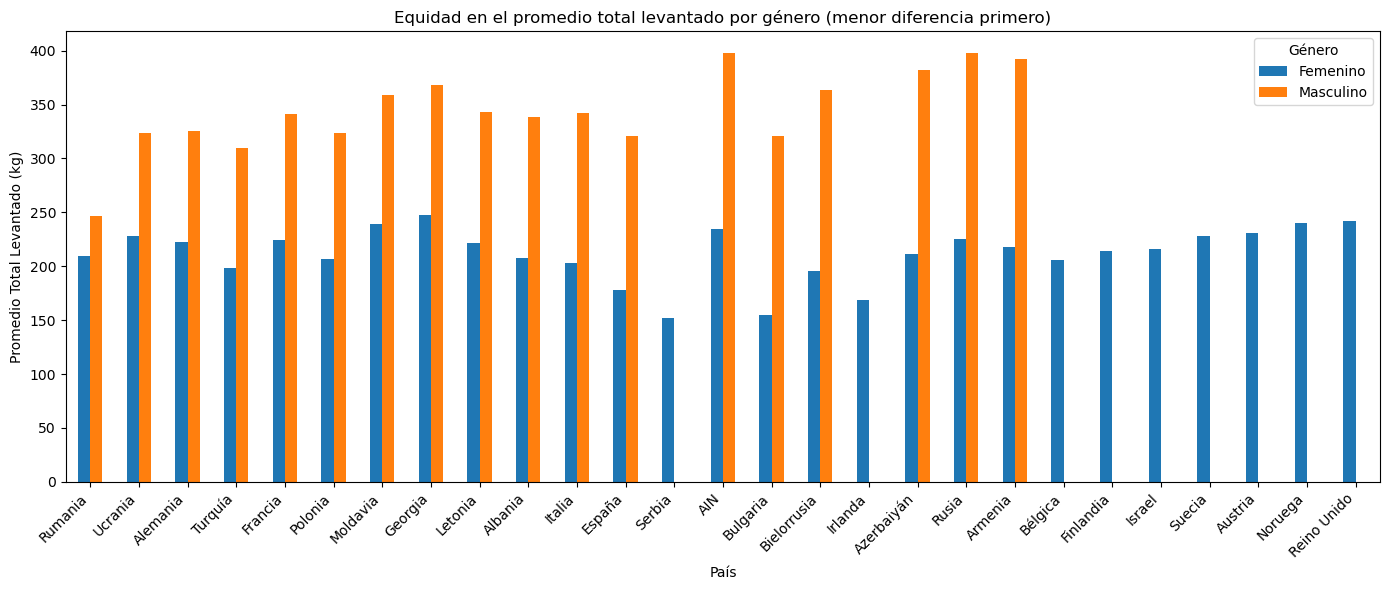

In [387]:
# Asegurar que esté hecho el cálculo anterior
promedio_por_genero = df_FINAL_ordenado_dos.groupby(['País', 'Género'])['Total'].mean().unstack(fill_value=0)
promedio_por_genero['Diferencia'] = abs(promedio_por_genero.get('Femenino', 0) - promedio_por_genero.get('Masculino', 0))
promedio_por_genero_ordenado = promedio_por_genero.sort_values(by='Diferencia')
# Seleccionar solo columnas de género para el gráfico
datos_promedios = promedio_por_genero_ordenado.drop(columns='Diferencia')
# Crear gráfico de barras agrupadas
datos_promedios.plot(kind='bar', figsize=(14, 6))
plt.title("Equidad en el promedio total levantado por género (menor diferencia primero)")
plt.xlabel("País")
plt.ylabel("Promedio Total Levantado (kg)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género')
plt.tight_layout()
plt.show()

In [388]:
# Podemos apreciar en este gráfico que algunos paises no tienen participación en algunos géneros, pero concluimos que Rumania es el país con la diferencia de promedio
# menor entre géneros.